# EDA
В данном ноутбуке можно найти визуальное представленние данных, изучение аномалий и их обработка

## Imports

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install pyarrow

You should consider upgrading via the 'D:\data science\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Transactions

In [113]:
transactions = pd.read_parquet('transaction_df.parquet')

In [114]:
transactions

product  price    amount       place            datetime
0       Целебные травы   3.90  1.242125  Анор Лондо 2216-01-02 16:28:00
1       Целебные травы   3.90 -0.079689  Анор Лондо 2216-01-02 16:21:00
2       Целебные травы   3.90  0.882450  Анор Лондо 2216-01-02 03:03:00
3       Целебные травы   3.90  0.621377  Анор Лондо 2216-01-02 03:12:00
4       Целебные травы   3.90  1.367161  Анор Лондо 2216-01-02 05:33:00
...                ...    ...       ...         ...                 ...
875031           Эстус   9.28  1.079104   Фалькония 2218-09-27 14:50:00
875032           Эстус   9.28  1.580617   Фалькония 2218-09-27 06:16:00
875033           Эстус   9.28  1.738492   Фалькония 2218-09-27 11:14:00
875034           Эстус   9.28  0.430340   Фалькония 2218-09-27 22:24:00
875035           Эстус   9.28  0.090248   Фалькония 2218-09-27 17:50:00

[875036 rows x 5 columns]

In [115]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875036 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   875036 non-null  object        
 1   price     875036 non-null  float64       
 2   amount    875036 non-null  float64       
 3   place     874604 non-null  object        
 4   datetime  875036 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(2), object(2)
memory usage: 33.4+ MB


### Промежуточные выводы
Можно заметить, что в данных есть пропуски в признаке `place`

In [116]:
transactions.isna().sum(axis=0)

product       0
price         0
amount        0
place       432
datetime      0
dtype: int64

### Визуализация категориальных признаков в Transactions 

In [117]:
def count_plot(data:pd.DataFrame, x:str):
    plt.title('Распределение \"x\"')
    sns.countplot(data=transactions, x=x)

Text(0.5, 1.0, 'Город')

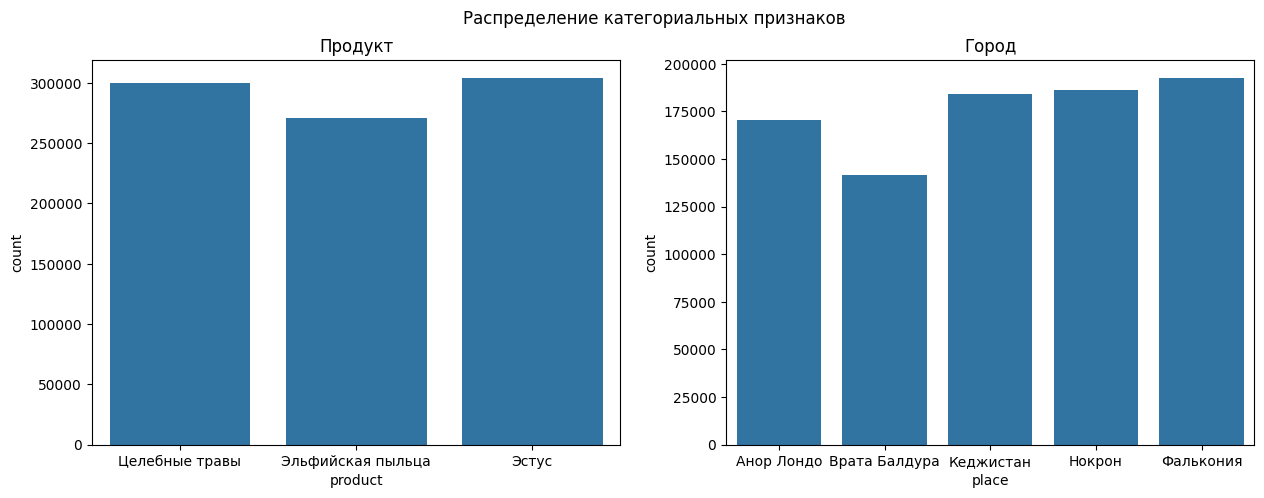

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение категориальных признаков')

sns.countplot(data=transactions, ax=axes[0], x='product')
sns.countplot(data=transactions, ax=axes[1], x='place')
axes[0].set_title('Продукт')
axes[1].set_title('Город')

### Промежуточные выводы
По графику выше можно сказать то, что данные достаточно хорошо сбалансированы относительно количества продаж по продуктам и местам, где товары были проданы

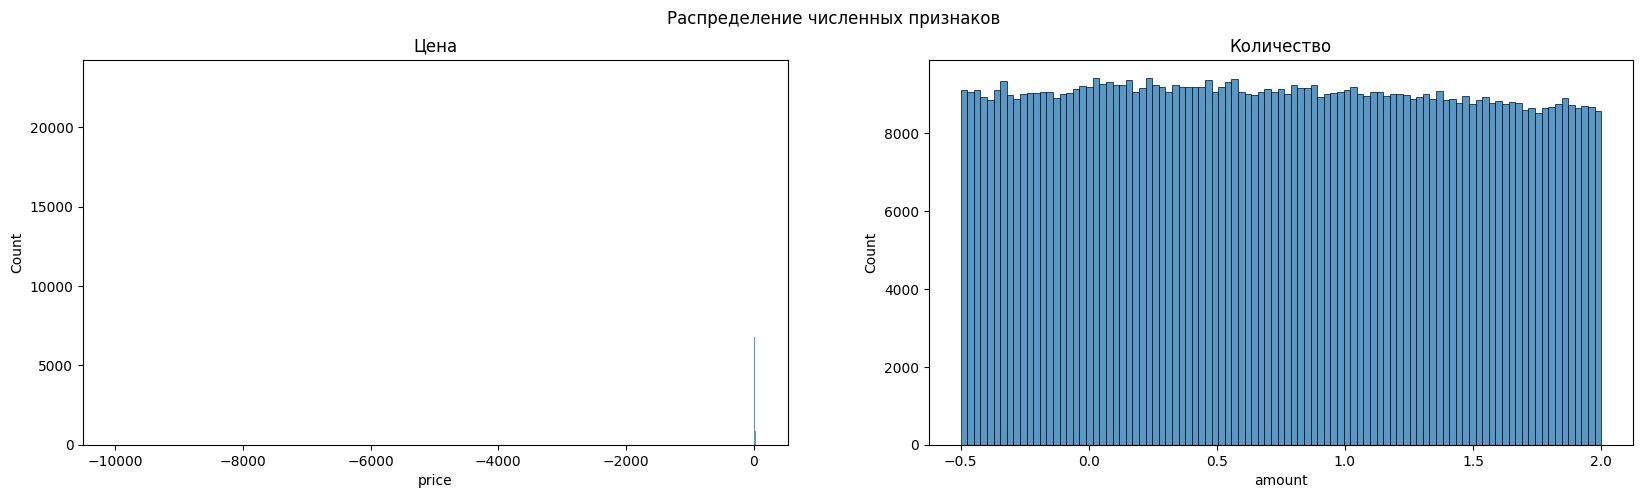

In [119]:
def histplot():
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    plt.suptitle('Распределение численных признаков')
    
    sns.histplot(data=transactions, x='price', ax=axes[0])
    sns.histplot(data=transactions, x='amount', ax=axes[1])
    axes[0].set_title('Цена')
    axes[1].set_title('Количество')

histplot()

In [120]:
transactions['price'].min()

-9998.99

### Промежуточные выводы по гистограммам
Сразу можем заметить по графику распределния признака `price`, что у нас все данные лежат в близости нуля, но есть сильные выбросы в отрицательную сторону. Из логичных размышлений можно сразу заметить, что цена `price` не может быть меньше нуля, схожая история и с количеством проданного товара в унциях. Поэтому удалим значения, которые меньше нуля, будем считать, что такие данные некорректные. Также удалим дубликаты в данных, если они имеются.

# Внимание
### Замечание
В данной ситуации можно было бы исправить аномалии в данных другими способами:
* Взять среднее для признака `amount`, учитывая равномерное практически равномерное распределение распределение 
* 

In [122]:
transactions.loc[transactions['price'] <= 0].shape, transactions.loc[transactions['amount'] < 0].shape

((54321, 5), (175559, 5))

In [123]:
valid_mask = (transactions['price'] >= 0) & (transactions['amount'] > 0) 
transactions = transactions.loc[valid_mask]

In [124]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655976 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   655976 non-null  object        
 1   price     655976 non-null  float64       
 2   amount    655976 non-null  float64       
 3   place     655659 non-null  object        
 4   datetime  655976 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(2), object(2)
memory usage: 30.0+ MB


### Промежуточные выводы
Заметим, что после удаления 'аномалий' в данных у нас также пропали пропуски в признаке `place`

Построим графики распределения снова

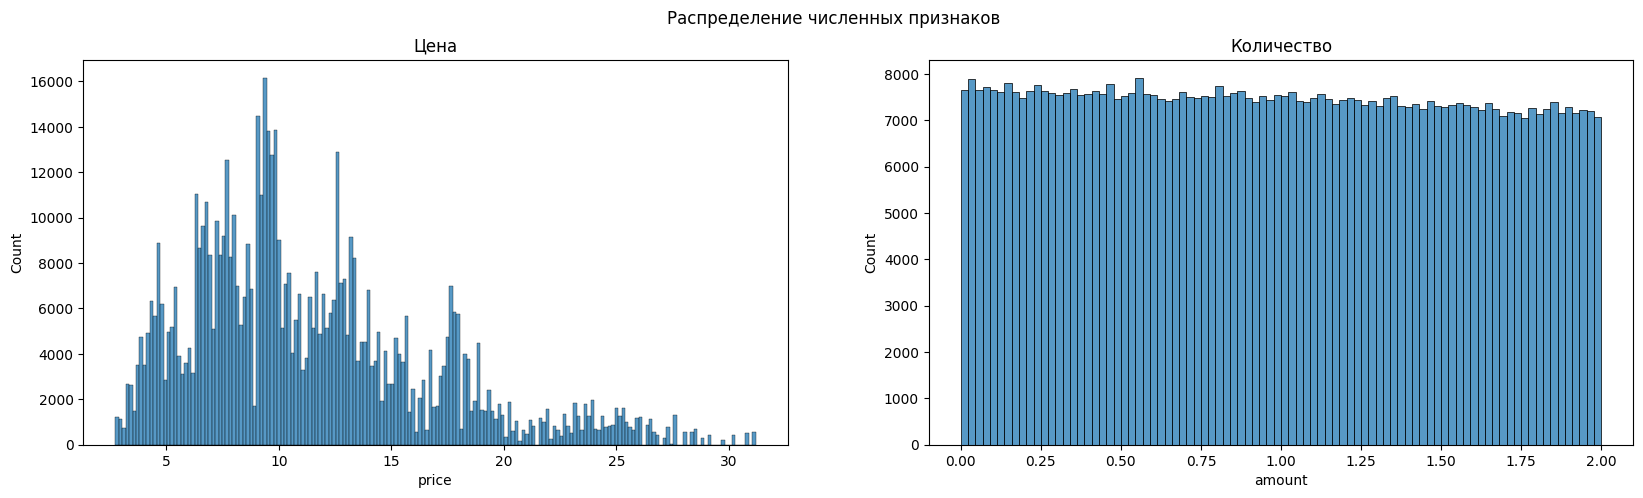

In [125]:
histplot()

Построим графики зависимости одного признака от другого

Text(0.5, 1.09, 'Попарное распределение численных признаков')

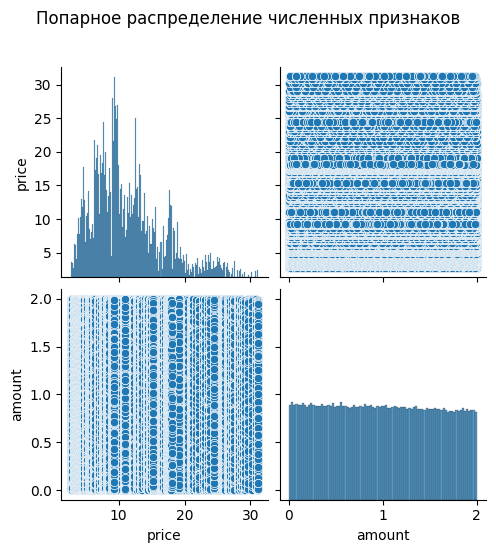

In [126]:
g = sns.pairplot(data=transactions)
g.fig.suptitle('Попарное распределение численных признаков', y=1.09)

In [127]:
temp_df = transactions[['product', 'price']]
temp_df.groupby(by='product').describe()

price                                                  \
                      count       mean       std   min    25%    50%    75%   
product                                                                       
Целебные травы     224876.0   8.990998  3.406149  2.73   6.65   8.50  10.93   
Эльфийская пыльца  203029.0  16.057148  5.081500  8.65  12.38  14.05  18.68   
Эстус              228071.0   9.652331  4.632527  2.87   6.52   8.86  10.46   

                          
                     max  
product                   
Целебные травы     19.09  
Эльфийская пыльца  31.20  
Эстус              24.42

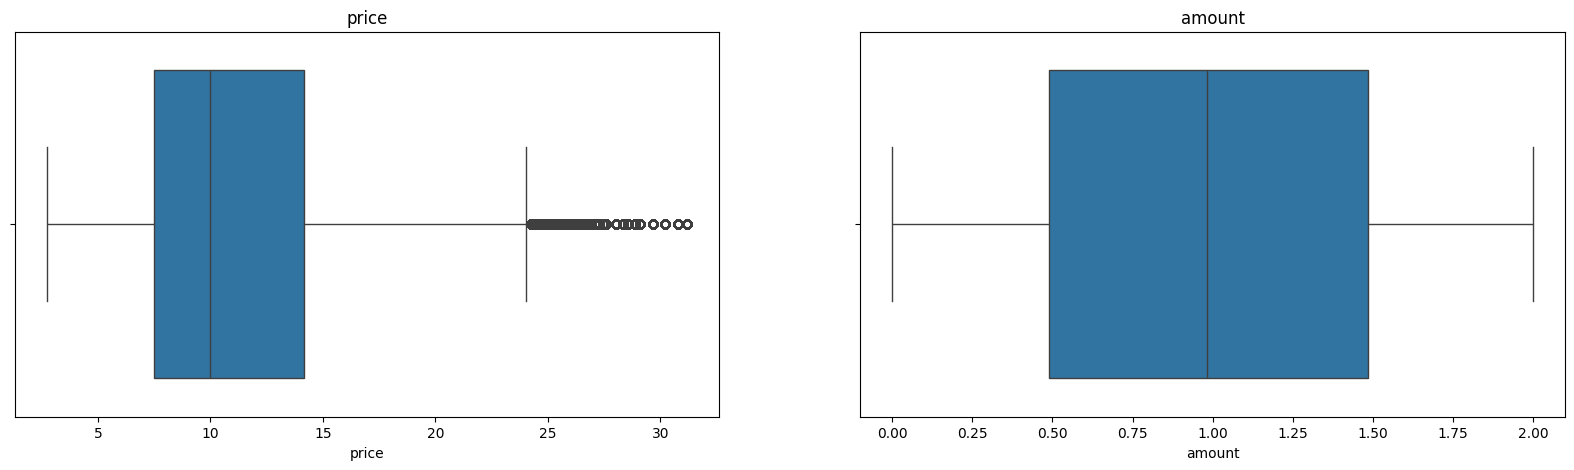

In [128]:
num_cols = ['price', 'amount']
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
for idx, feature in enumerate(num_cols):
    sns.boxplot(x=transactions[feature], ax=axes[idx])
    axes[idx].set_title(feature)

In [129]:
transactions['datetime'].min(), transactions['datetime'].max()

(Timestamp('2216-01-02 00:08:00'), Timestamp('2218-09-27 23:57:00'))

## Weather
Данные содержат в себе погоды в формате one-hot-encoding для каждого года и города в интервале [`2216-01-02`, `2218-09-27`]. Пропусков в данных нет

In [130]:
weather = pd.read_parquet('weather_df.parquet')

In [131]:
weather.head(5)

place  hot  rain  snow       date
0      Фалькония    0     0     0 2216-01-02
1     Анор Лондо    1     0     0 2216-01-02
2  Врата Балдура    0     0     1 2216-01-02
3         Нокрон    0     0     0 2216-01-02
4      Кеджистан    0     0     1 2216-01-02

In [132]:
weather.shape

(5000, 5)

In [133]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   place   5000 non-null   object        
 1   hot     5000 non-null   int64         
 2   rain    5000 non-null   int64         
 3   snow    5000 non-null   int64         
 4   date    5000 non-null   datetime64[us]
dtypes: datetime64[us](1), int64(3), object(1)
memory usage: 195.4+ KB


In [134]:
weather['place'].value_counts()

place
Фалькония        1000
Анор Лондо       1000
Врата Балдура    1000
Нокрон           1000
Кеджистан        1000
Name: count, dtype: int64

Интервал даты 

In [135]:
weather['date'].min(), weather['date'].max()

(Timestamp('2216-01-02 00:00:00'), Timestamp('2218-09-27 00:00:00'))

In [136]:
weather_count = {
    'hot': 0,
    'rain': 0,
    'snow': 0,
    'nothing': 0,
}

weather_count['hot'] = weather[weather['hot'] == 1].shape[0]
weather_count['snow'] = weather[weather['snow'] == 1].shape[0]
weather_count['rain'] = weather[weather['rain'] == 1].shape[0]
weather_count['nothing'] = weather.shape[0] - weather_count['hot'] - weather_count['rain'] - weather_count['snow']

Text(0.5, 1.0, 'Распределение погоды')

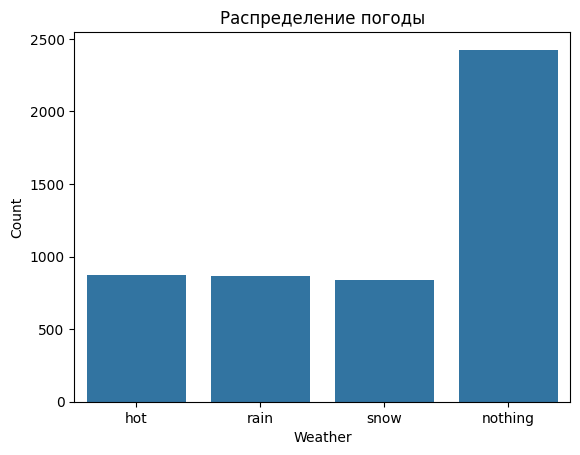

In [137]:
tmp_df = pd.DataFrame(list(weather_count.items()), columns=['Weather', 'Count'])

sns.barplot(x='Weather', y='Count', data=tmp_df)
plt.title('Распределение погоды')

### Промежуточные выводы
В большее кол-во дней погода была хорошая без жары, снега и дождя. 

## Cost
Таблица хранит себестоимость каждого из товара в каждом из городов, где есть магазины. В данных нет пропусков.

In [138]:
cost_df = pd.read_parquet('df_cost.parquet')

In [139]:
cost_df.head(3)

place         product  cost       date
0  Анор Лондо  Целебные травы  2.07 2216-01-02
1  Анор Лондо  Целебные травы  3.07 2216-01-26
2  Анор Лондо  Целебные травы  3.30 2216-02-12

In [140]:
cost_df.shape

(1117, 4)

In [141]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   place    1117 non-null   object        
 1   product  1117 non-null   object        
 2   cost     1117 non-null   float64       
 3   date     1117 non-null   datetime64[us]
dtypes: datetime64[us](1), float64(1), object(2)
memory usage: 35.0+ KB


In [142]:
cost_df['place'].value_counts()

place
Анор Лондо       226
Нокрон           225
Кеджистан        224
Врата Балдура    223
Фалькония        219
Name: count, dtype: int64

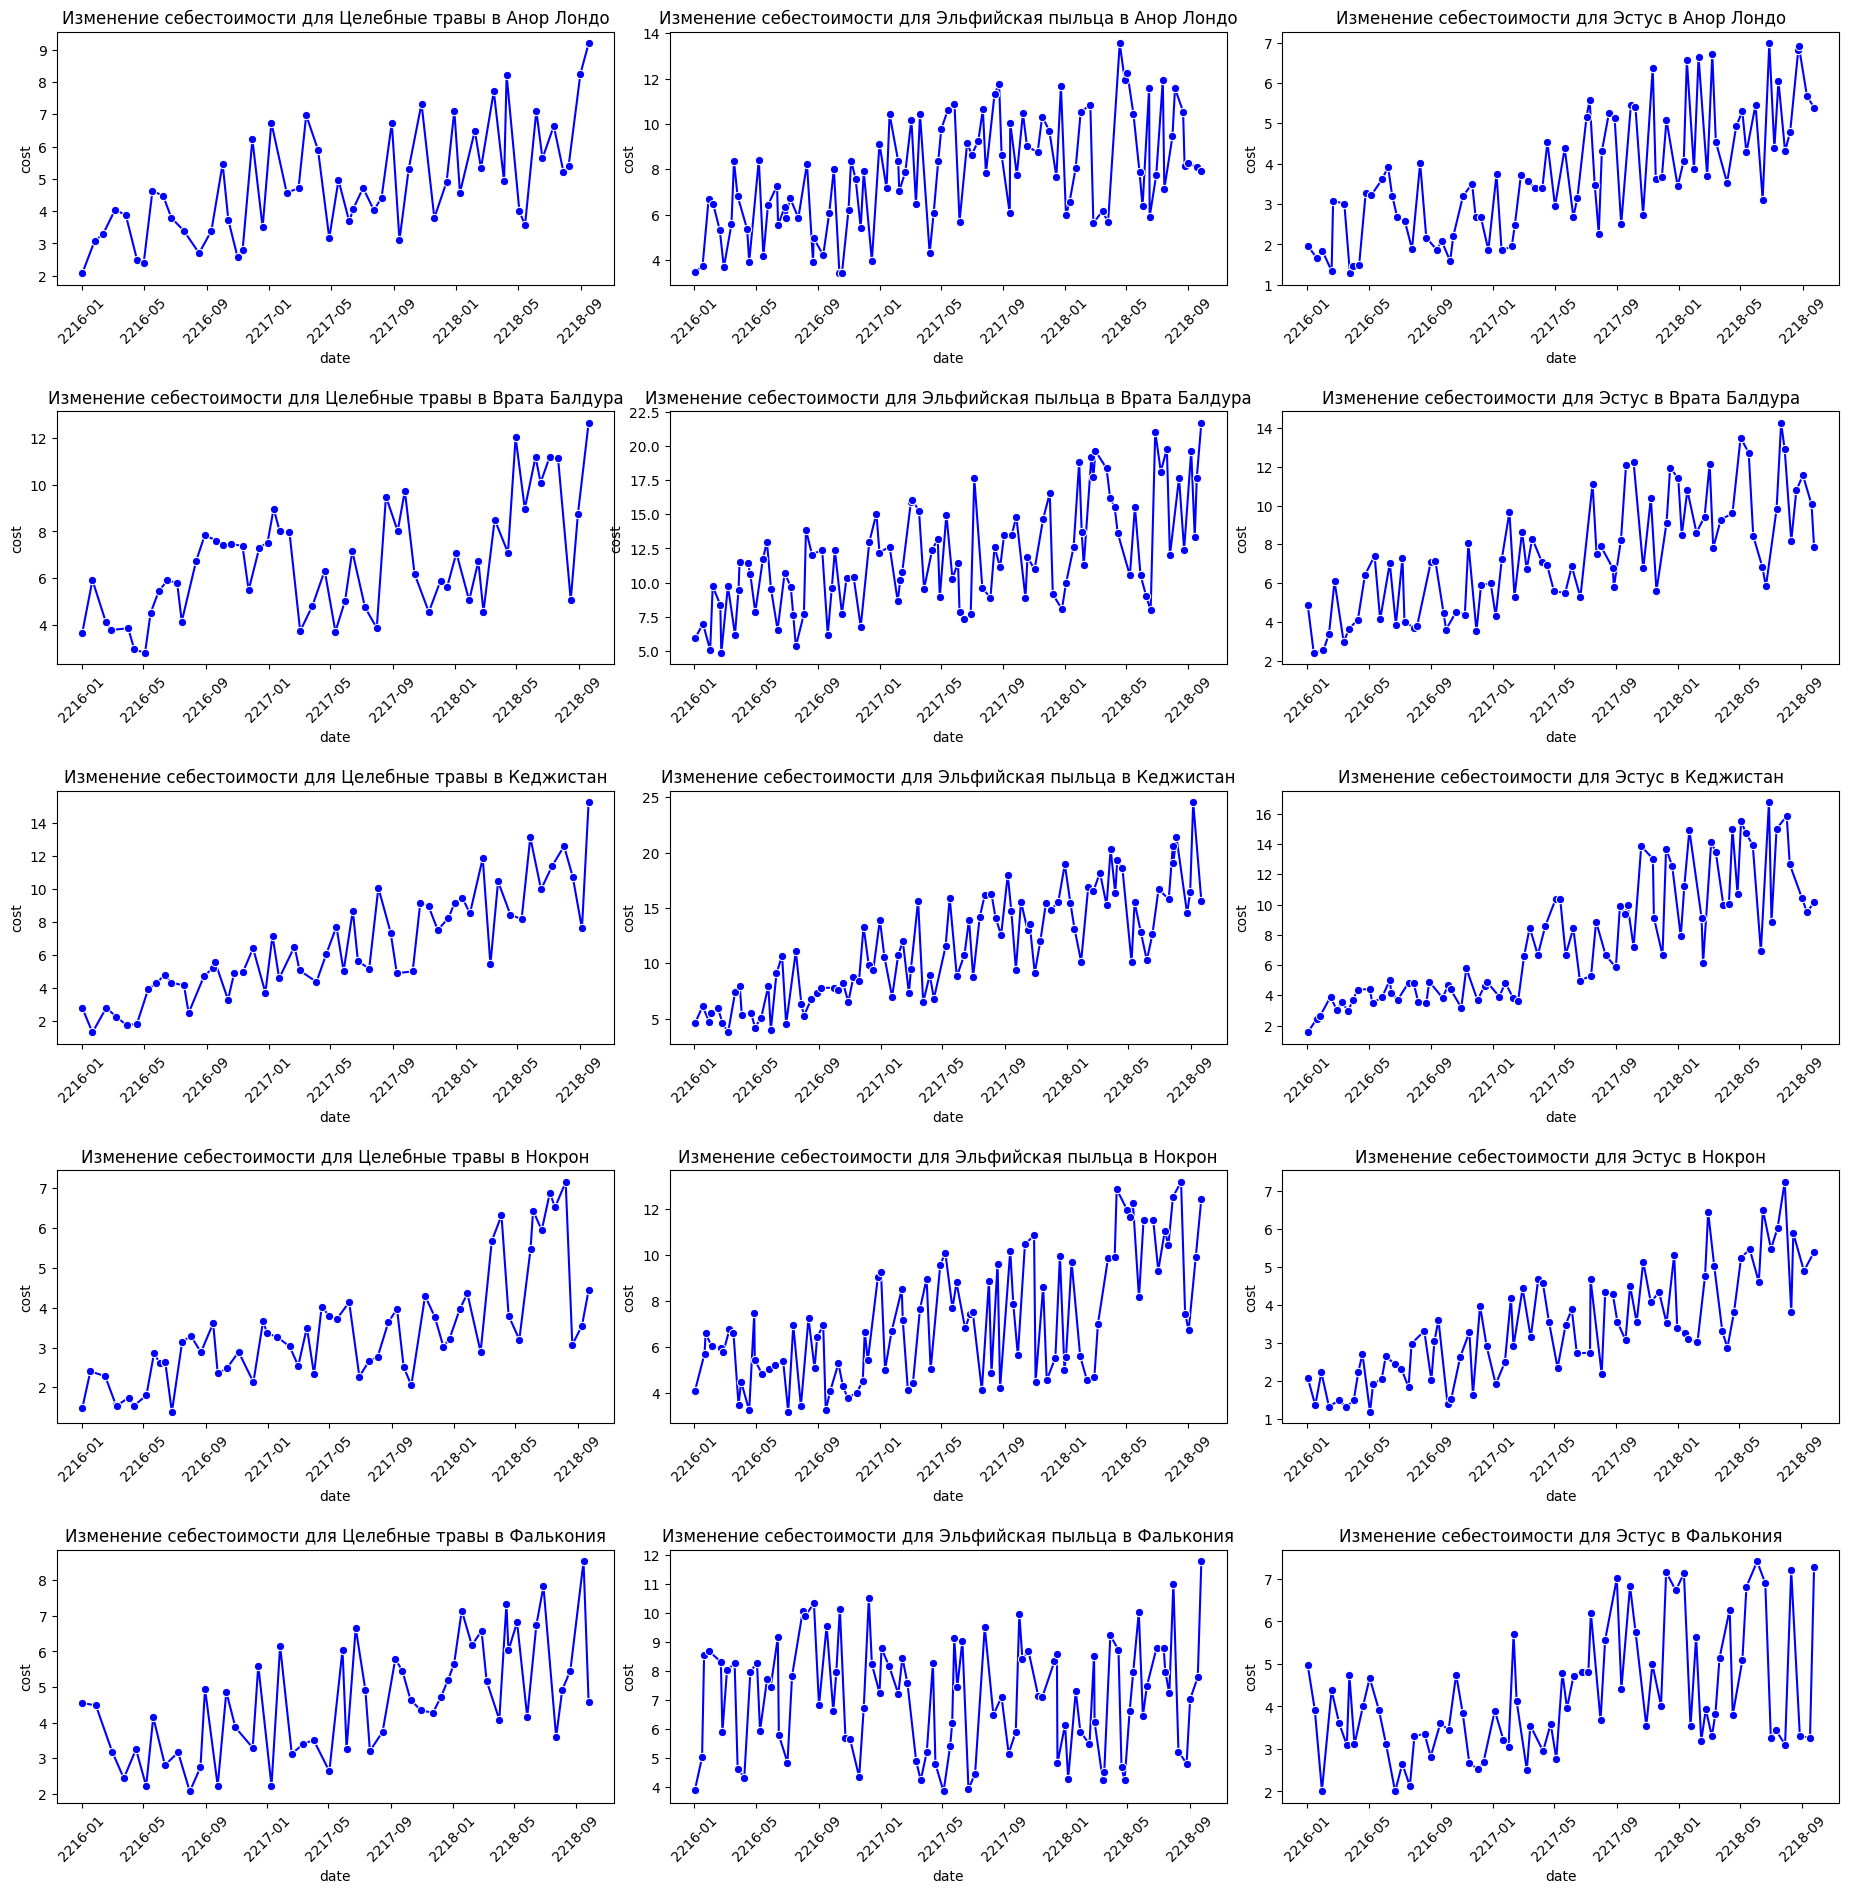

In [147]:
def relation_time_cost(places, products):
    fig, axes = plt.subplots(len(places), len(products), figsize=(23, 23))
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    plt.title('Изменение себестоимости с течением времени')
    
    for i, place in enumerate(places):
        for j, product in enumerate(products):
            mask = (cost_df['place'] == place) & (cost_df['product'] == product)
            cost_data = cost_df.loc[mask]
            
            cost_data = cost_data[['cost', 'date']].sort_values(by='date')
            
            sns.lineplot(x='date', y='cost', data=cost_data, marker='o', color='b', ax=axes[i, j])
            axes[i, j].set_title(f'Изменение себестоимости для {product} в {place}')
            axes[i, j].tick_params(axis='x', rotation=45)

    plt.savefig('images/cost_by_time_plot.png')

places = cost_df['place'].unique()
products = cost_df['product'].unique()
relation_time_cost(places, products)

In [150]:
cost_df['date'].min(), cost_df['date'].max()

(Timestamp('2216-01-02 00:00:00'), Timestamp('2218-09-27 00:00:00'))

## Competitors
По первому анализу в данных не содержится пропущенных значений 

In [151]:
df_competitors = pd.read_parquet('df_competitors.parquet')
df_competitors.shape

(31799, 5)

In [152]:
df_competitors.head(3)

place         product   competitor  price       date
0  Анор Лондо  Целебные травы  Арториас&Co   3.78 2216-01-04
1  Анор Лондо  Целебные травы  Арториас&Co   3.78 2216-01-05
2  Анор Лондо  Целебные травы  Арториас&Co   3.78 2216-01-06

In [153]:
df_competitors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31799 entries, 0 to 39456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   place       31799 non-null  object        
 1   product     31799 non-null  object        
 2   competitor  31799 non-null  object        
 3   price       31799 non-null  float64       
 4   date        31799 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(1), object(3)
memory usage: 1.5+ MB


In [154]:
df_competitors['date'].min(), df_competitors['date'].max()

(Timestamp('2216-01-02 00:00:00'), Timestamp('2218-09-27 00:00:00'))

Text(0.5, 1.0, 'Распределение стоимости у конкурента')

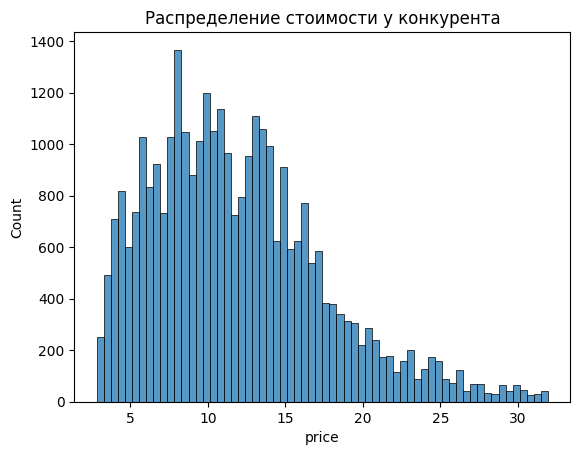

In [155]:
sns.histplot(data=df_competitors, x='price')
plt.title('Распределение стоимости у конкурента')

### Промежуточные выводы
Можно заметить, что данные распределены очень схоже с ценами в датасете `transactions`. Также по гистограмме ниже можно увидеть, что данные о конкурентах представленны достаточно сбалансировано

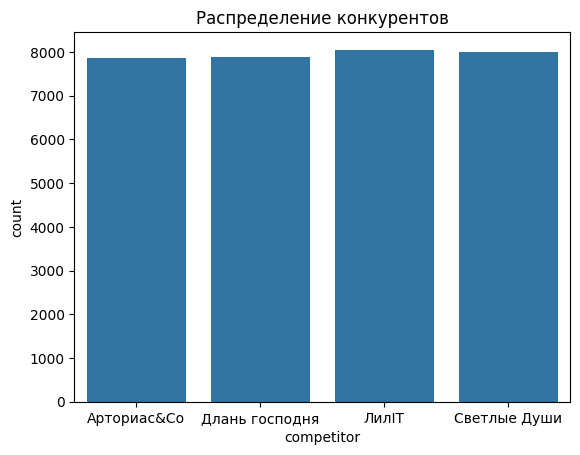

In [156]:
sns.countplot(data=df_competitors, x='competitor')
plt.title('Распределение конкурентов')
plt.savefig('images/comp_ditrs.png')

## Агрегация данных, для дальнейшего исследования
Возьмем датасет `transactions`, преобразуем признак `datetime` -> `date`, который хранит в себе дату и время, в формат: `год-месяц-день`. И сгруппируем по признакам: `place`, `product`, `date`. Агрегация признаков `amount` сделаем с помощью суммы, чтобы понять какое кол-во мы продали за день. А признак `price` агрегируем с помощью среднего арифметического, так как в течение дня сумма фиксированная, мы получим в результате цену, которая была в тот день.

In [157]:
from datetime import datetime

In [158]:
transactions_by_date = transactions.copy()
transactions_by_date['date'] = transactions_by_date['datetime'].apply(lambda x: x.date())

In [159]:
transactions_by_date.head(3)

product  price    amount       place            datetime        date
0  Целебные травы    3.9  1.242125  Анор Лондо 2216-01-02 16:28:00  2216-01-02
2  Целебные травы    3.9  0.882450  Анор Лондо 2216-01-02 03:03:00  2216-01-02
3  Целебные травы    3.9  0.621377  Анор Лондо 2216-01-02 03:12:00  2216-01-02

In [160]:
transactions_by_date = transactions_by_date[['product', 'price', 'amount', 'place', 'date']].groupby(by=['product', 'place', 'date'])
transactions_by_date = transactions_by_date.agg({'amount': 'sum', 'price': 'mean'}).reset_index()
transactions_by_date.head(3)

product       place        date     amount  price
0  Целебные травы  Анор Лондо  2216-01-02  37.802874    3.9
1  Целебные травы  Анор Лондо  2216-01-03  43.264844    3.9
2  Целебные травы  Анор Лондо  2216-01-04  35.629889    3.9

In [161]:
transactions_by_date['date'] = pd.to_datetime(transactions_by_date['date'])

## Суммарное кол-во проданного товара за день

Визуализируем распределение признака `amount`

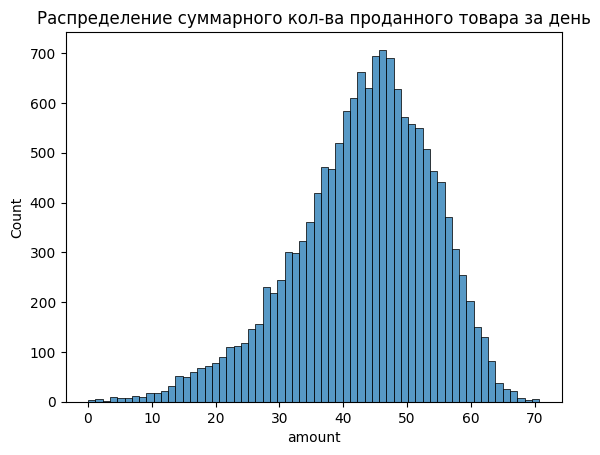

In [167]:
sns.histplot(data=transactions_by_date, x='amount')
plt.title('Распределение суммарного кол-ва проданного товара за день')
plt.savefig('images/sum_amount_distr.png')

### Проверка признака amount на нормальное распределение
Сделаем это, используя статистический критерий тест Шапиро-Уилка и визуализацию с помощью `Q-Q-plot`

In [163]:
from scipy.stats import shapiro

data = np.log(transactions_by_date['amount'].tolist())

statistic, p_value = shapiro(data)

print(f'Statistic: {statistic}, P-Value: {p_value}')

if p_value > 0.05:
    print('Распределение похоже на нормальное')
else:
    print('Распределение не является нормальным')


Statistic: 0.817382276058197, P-Value: 0.0
Распределение не является нормальным


D:\data science\venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


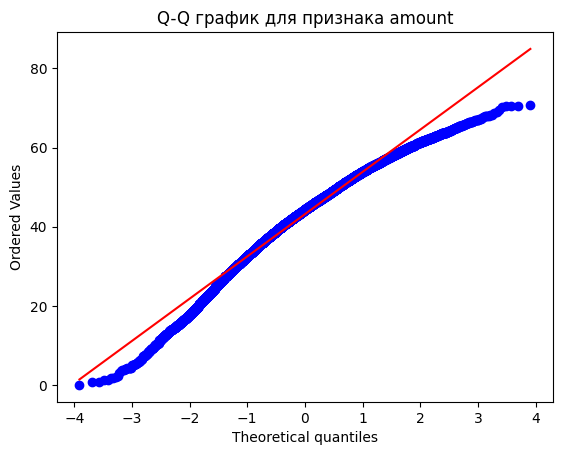

In [168]:
from scipy.stats import probplot

data = transactions_by_date['amount']
probplot(data, dist='norm', plot=plt)
plt.title('Q-Q график для признака amount')
plt.savefig('images/q-q_sum_amount.png')
plt.show()

**Выборка распределена ненормально при выбранном p-value равном 0.05** 

### Изменение в течение времени суммарного кол-ва проданного товара за день

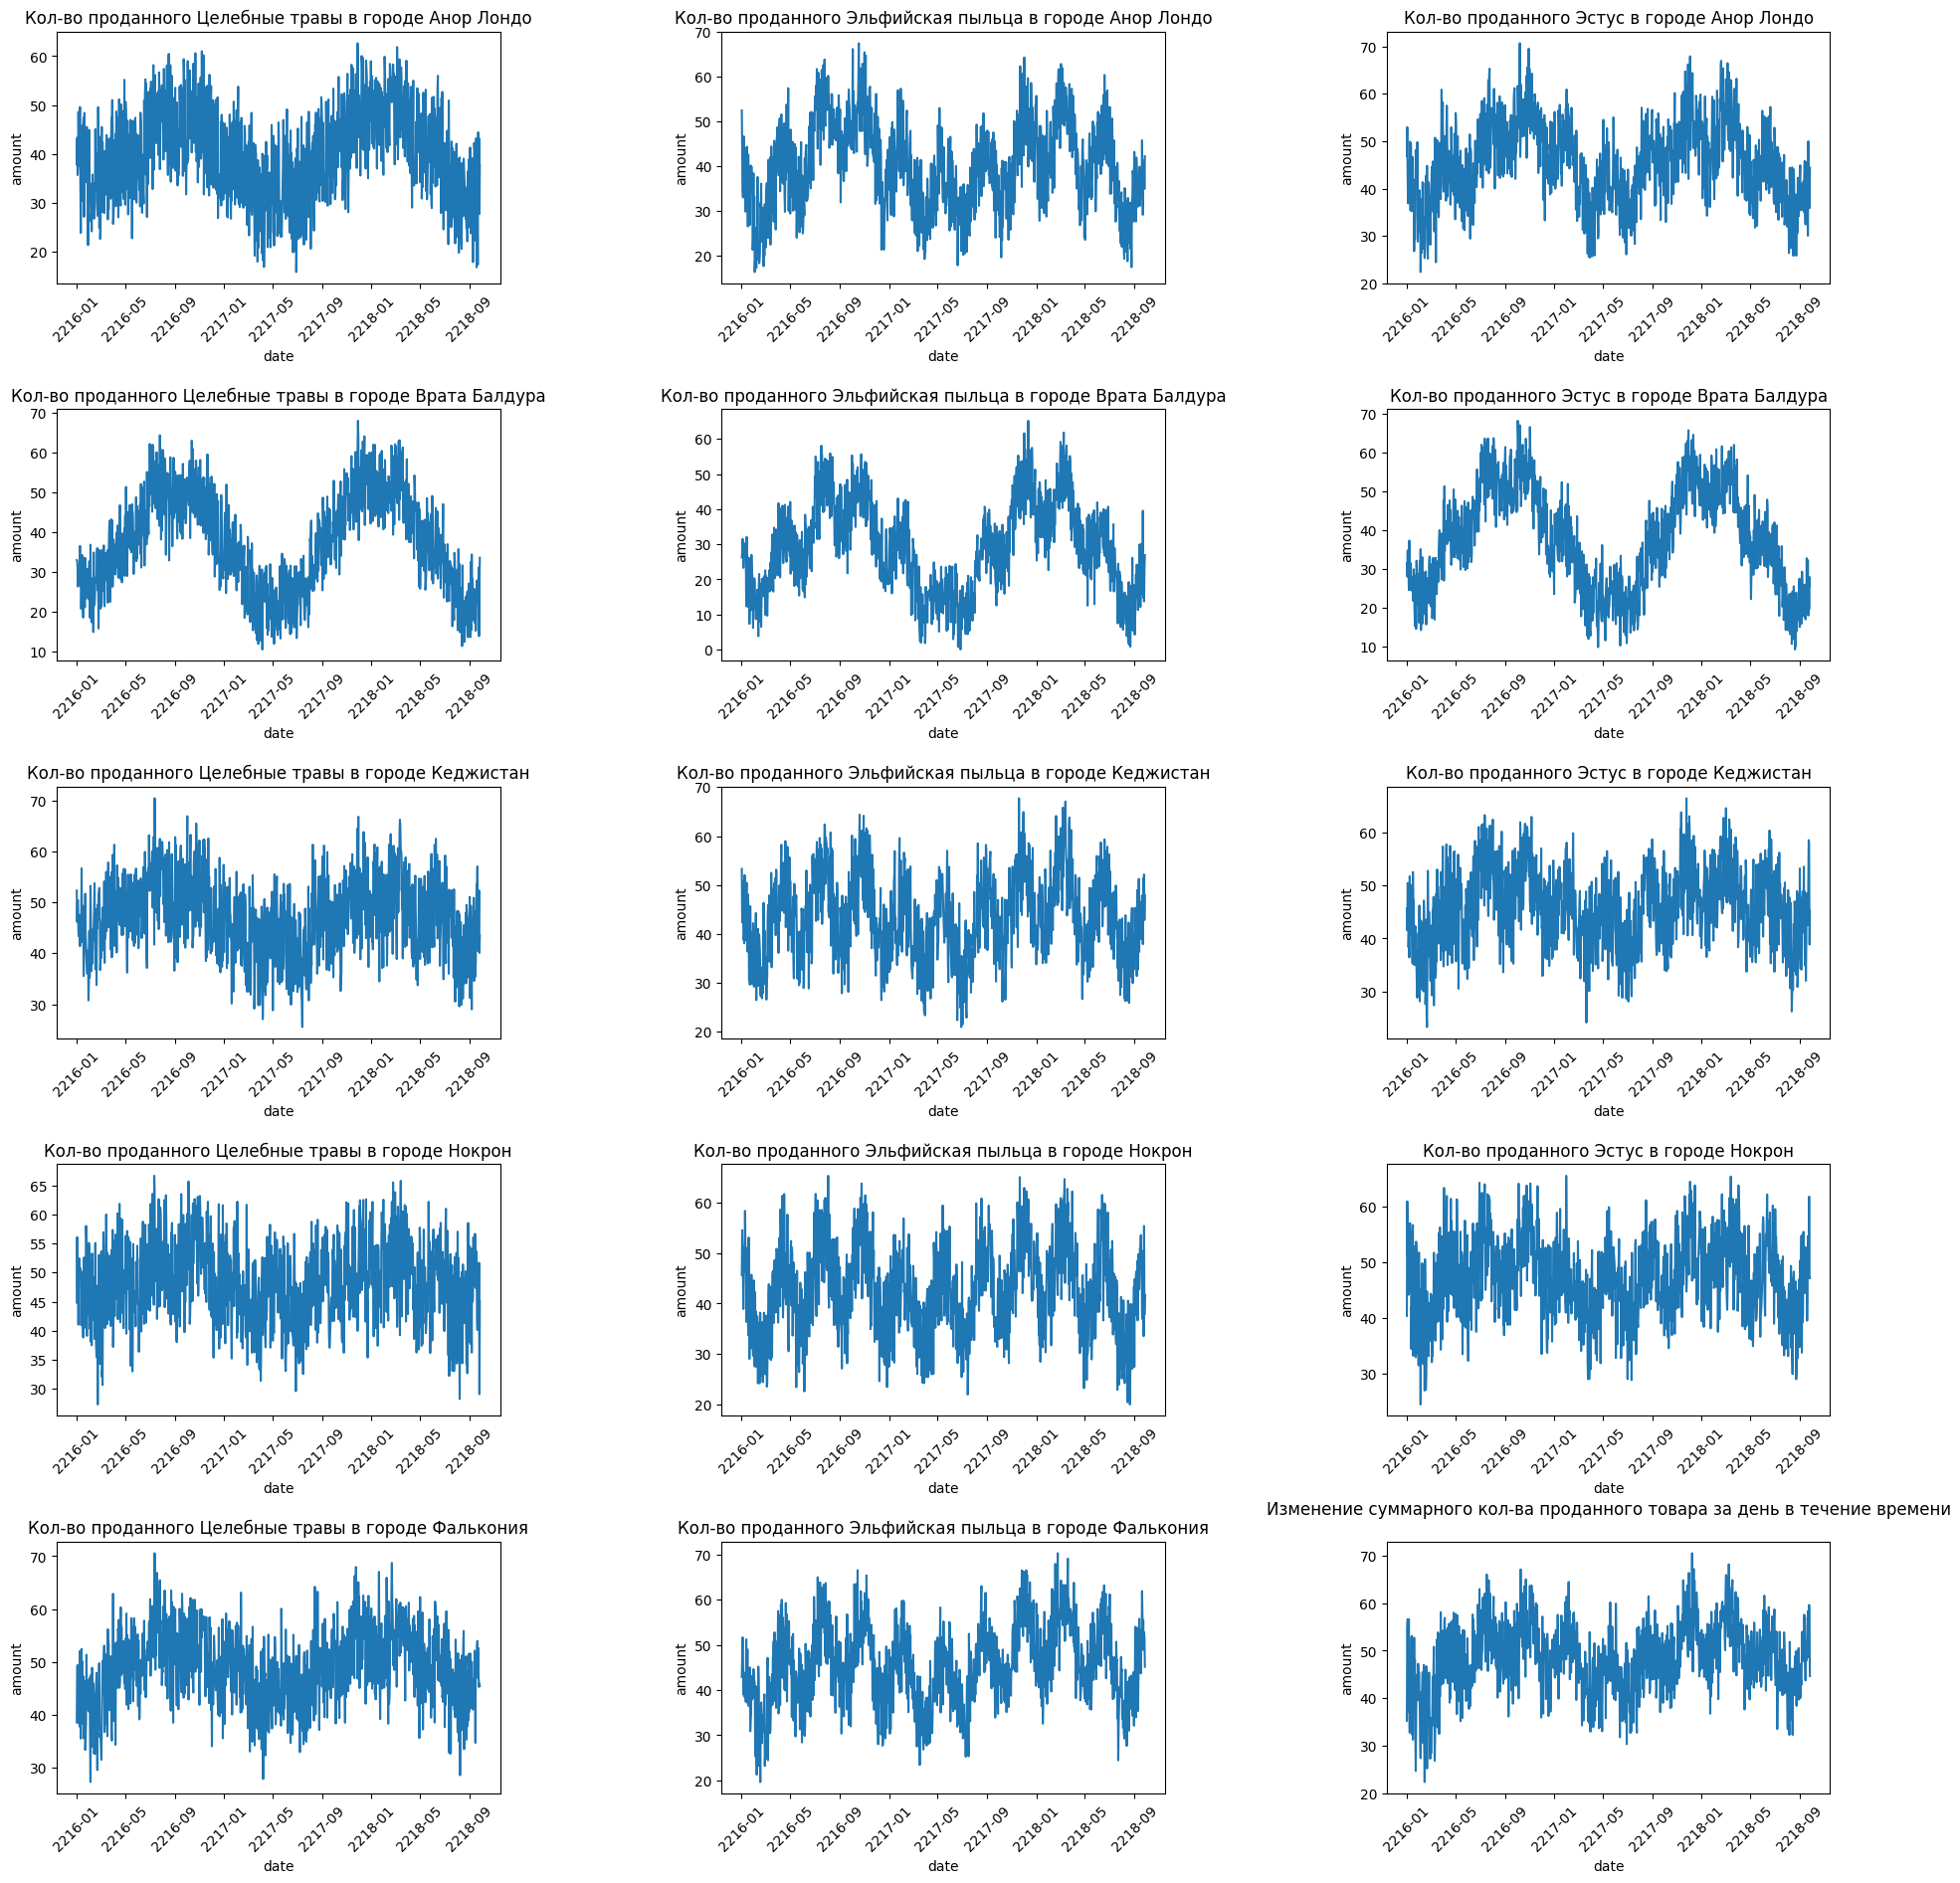

In [166]:
products = transactions_by_date['product'].unique().tolist()
places = transactions_by_date['place'].unique().tolist()

fig, axes = plt.subplots(len(places), len(products), figsize=(23, 23))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, place in enumerate(places):
    for j, product in enumerate(products):
        mask_product = transactions_by_date['product'] == product
        mask_place = transactions_by_date['place'] == place
        amount_product = transactions_by_date.loc[mask_product & mask_place]
        amount_product = amount_product.sort_values('date')
        
        sns.lineplot(data=amount_product, x='date', y='amount', ax=axes[i, j])
        axes[i, j].set_title(f'Кол-во проданного {product} в городе {place}')
        axes[i, j].tick_params(axis='x', rotation=45)

plt.title('Изменение суммарного кол-ва проданного товара за день в течение времени', pad=20)
plt.savefig('images/sum_amount_time.png')

### Промежуточные выводы по графикам
Можно заметить, что на многих графиках отчетливо проглядывается цикличность в изменчивости суммарного количества.
О какой-то сезонности сложно говорить, для этого можно рассмотреть графики распределения по дням в каждом из году, на более мелком масштабе 

## Изменение цены для каждого из товаров по городам
Сравним как изменялись цены на продукты в каждом городе для каждого продукта

In [169]:
products = transactions_by_date['product'].unique().tolist()
places = transactions_by_date['place'].unique().tolist()

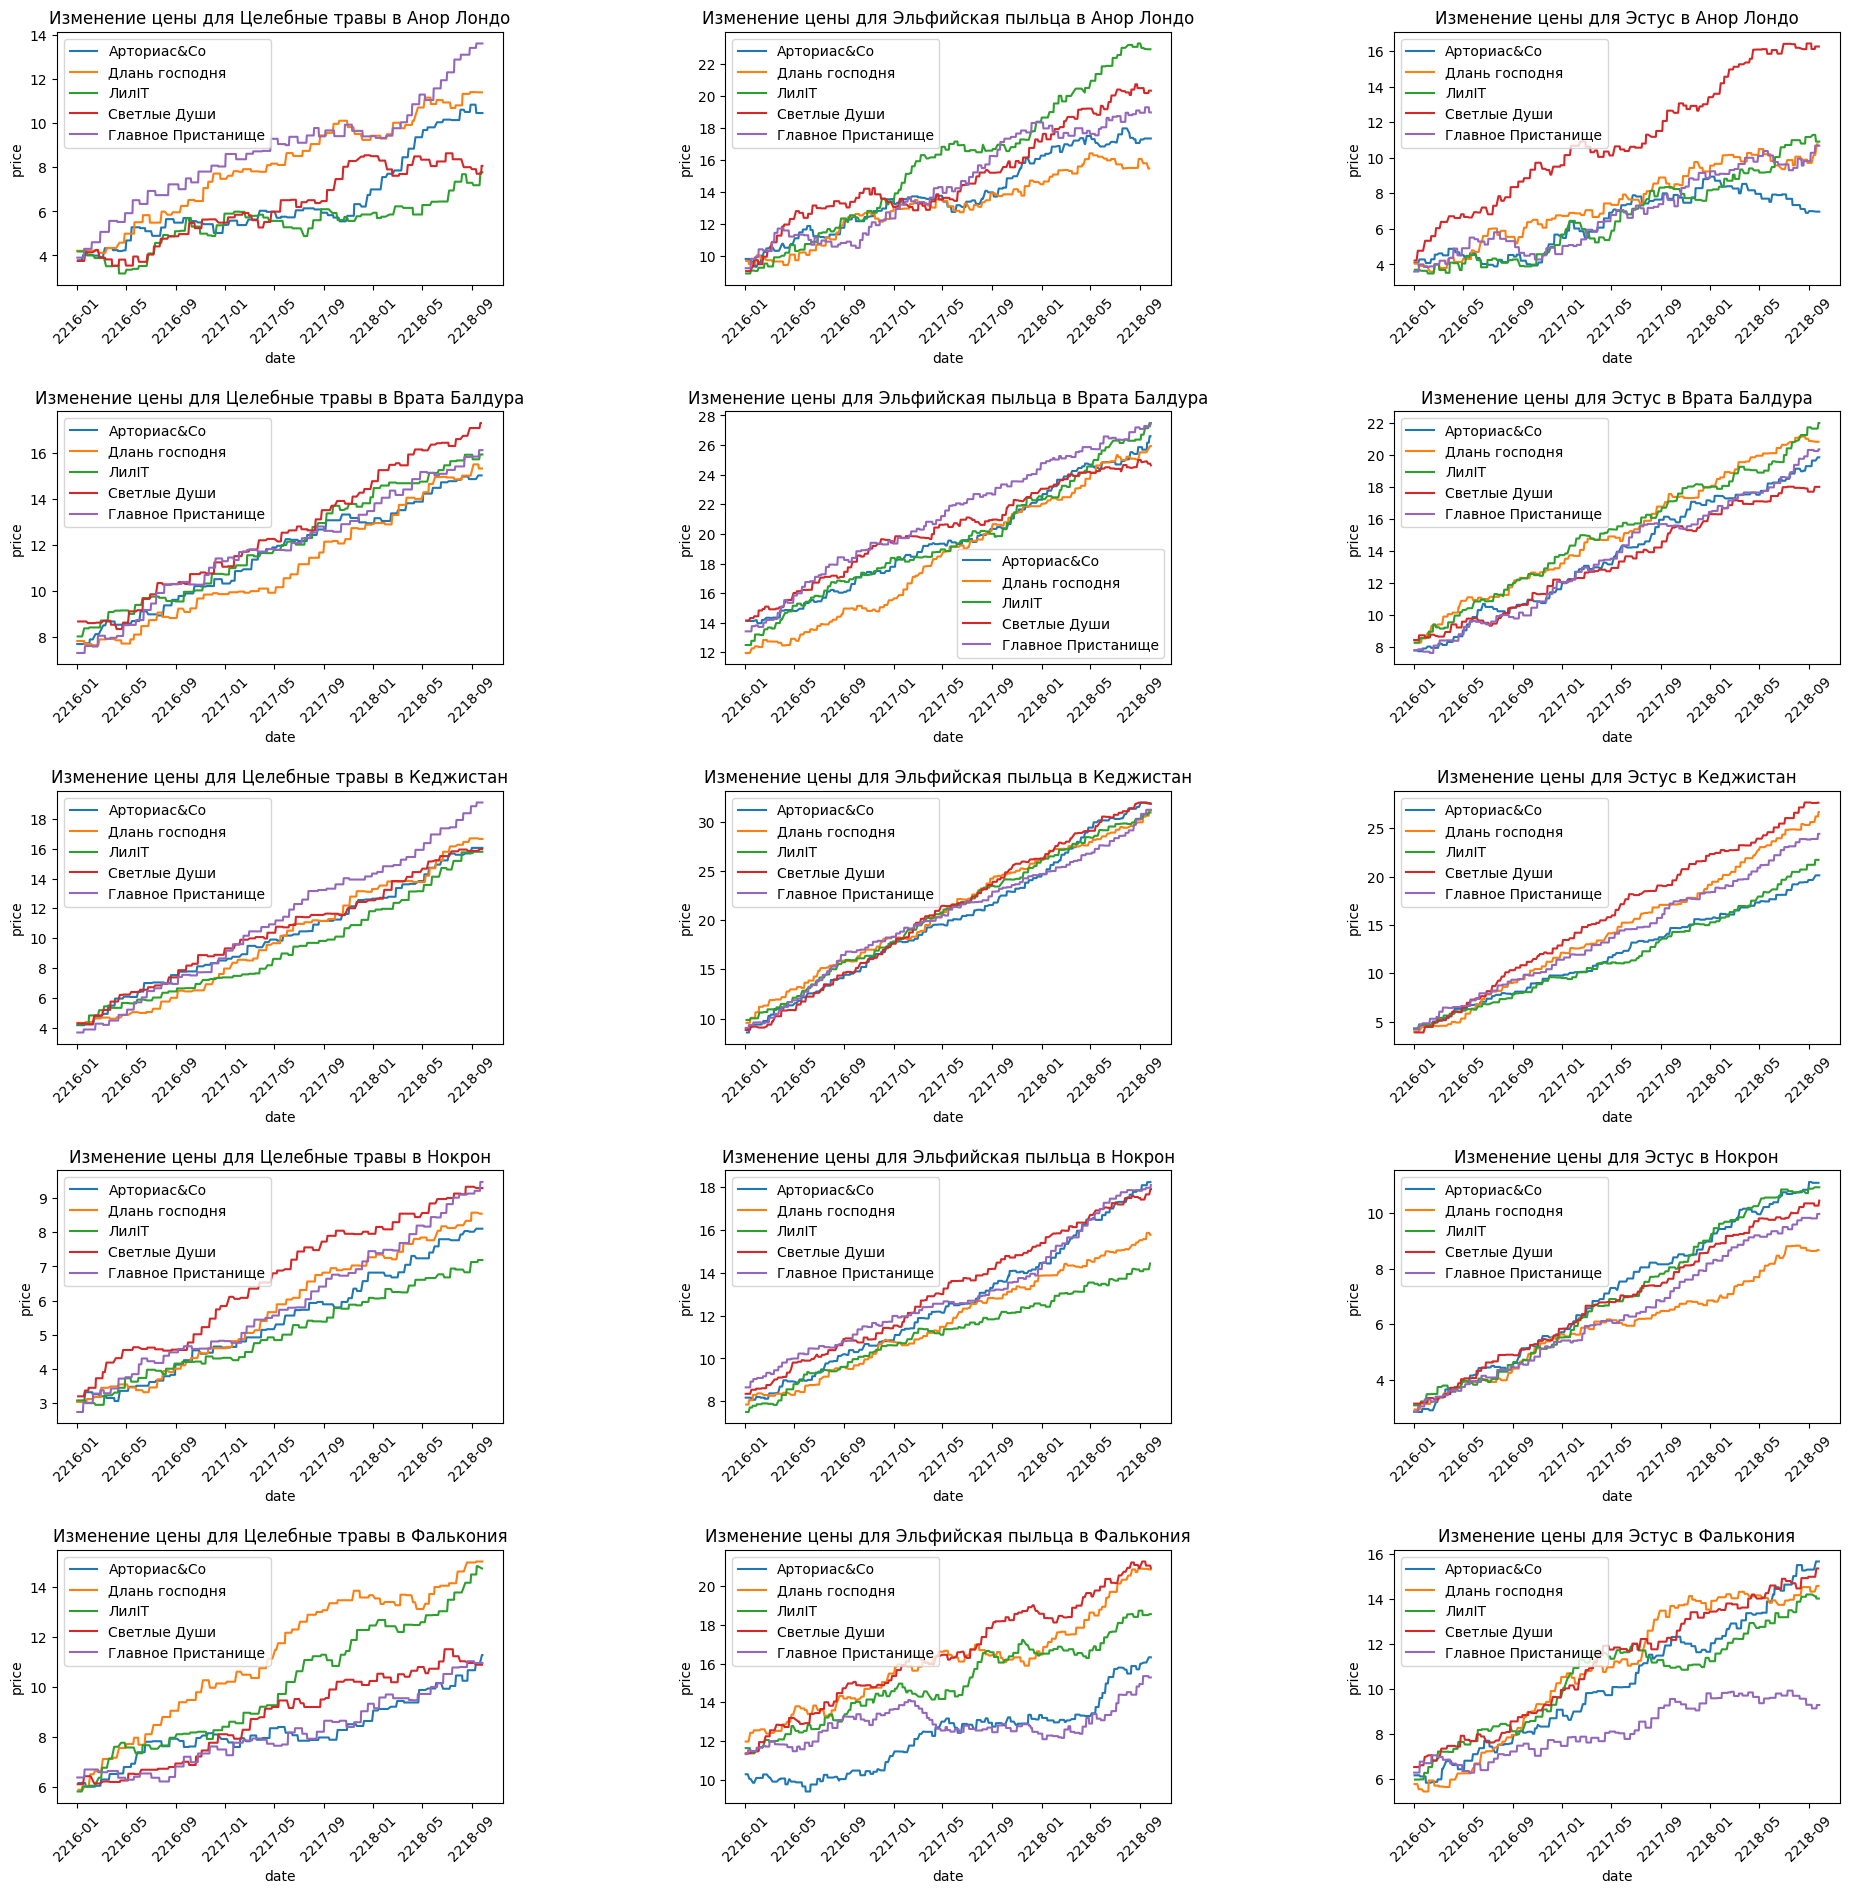

In [170]:
fig, axes = plt.subplots(len(places), len(products), figsize=(23, 23))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, place in enumerate(places):
    for j, product in enumerate(products):
        mask = (transactions_by_date['product'] == product) & (transactions_by_date['place'] == place)
        temp_df = transactions_by_date.loc[mask]

        for competitor in df_competitors['competitor'].unique().tolist():
            mask_comp = (df_competitors['place'] == place) & (df_competitors['product'] == product) & (df_competitors['competitor'] == competitor)
            temp_df_comp = df_competitors.loc[mask_comp]
            sns.lineplot(data=temp_df_comp, x='date', y='price', ax=axes[i, j], label=f'{competitor}')
        sns.lineplot(data=temp_df, x='date', y='price', ax=axes[i, j], label='Главное Пристанище')
        axes[i, j].set_title(f'Изменение цены для {product} в {place}')
        axes[i, j].tick_params(axis='x', rotation=45)

plt.savefig('images/changing_price_time.png')

### Выводы
Можно точно сказать, что ряды нестационарные и имеют явный тренд

## Преобразование данных для дальнейшего исследования
Создадим таблицу форматао
* `date` - дата в формате `год-месяц-день`
* `place` - название места продажи
* `product` - название продукта
* `price` - цена в нашей организации "Главное пристанище"
* `арториас&Сo` - цена в организации "арториас&Сo"  
* `лилIT` - цена в организации "лилIT"
* `длань_господня` - цена в организации "лилIT"
* `светлые_души` - цена в организации "светлые_души"
* `cost` - себестоимость продукции 
* `amount` - кол-во проданного нашей огранизацией за день по определенной позиции в определенном городем городе


### Замечание
В процессе выполнения данного раздела было замечено то, что не для каждого дня есть показатели цен по каждому из продуктов в каждом из городов по всем конкурентам *Пример ниже*. В примере видно, что мы за дату `2216-01-04` для продукта `Целебные травы` в городе `Анор Лондо`. Имеем данные только по двум конкурентам. Учитывая, что цену можно изменять раз в три дня. Если по какому-то товару от какого-то конкурента пропущена дата, будем использовать последную известную 

In [172]:
mask_for_example = (df_competitors['date'] == pd.to_datetime('2216-01-04')) & \
    (df_competitors['place'] == 'Анор Лондо') & (df_competitors['product'] == 'Целебные травы')

df_competitors.loc[mask_for_example]

place         product   competitor  price       date
0     Анор Лондо  Целебные травы  Арториас&Co   3.78 2216-01-04
1265  Анор Лондо  Целебные травы        ЛилIT   4.18 2216-01-04

Перейдем к преобразованию данных

In [173]:
transactions_by_date_copy = transactions_by_date.copy()

In [174]:
df_competitors['competitor'].unique().tolist()

['Арториас&Co', 'Длань господня', 'ЛилIT', 'Светлые Души']

In [175]:
prices_for_each_company = {
    'Арториас&Co' : [],
    'Длань господня': [],
    'ЛилIT': [],
    'Светлые Души': []
}

for idx, row in transactions_by_date_copy.iterrows():
    mask_place = df_competitors['place'] == row['place']
    mask_product = df_competitors['product'] == row['product']
    mask_date = df_competitors['date'] == row['date']

    df_comp_with_mask = df_competitors.loc[mask_date & mask_place & mask_product]

    for competitor in prices_for_each_company.keys():
        mask_is_contains = df_comp_with_mask['competitor'] == competitor
        if mask_is_contains.sum() > 0:
            price = df_comp_with_mask[mask_is_contains]['price'].item()
            prices_for_each_company[competitor].append(price)
        else:
            prices_for_each_company[competitor].append(np.nan)

In [176]:
prices_company_df = pd.DataFrame.from_dict(prices_for_each_company)

In [177]:
transactions_comp_prices = pd.concat([transactions_by_date_copy, prices_company_df], axis=1)

In [178]:
transactions_comp_prices.head(3)

product       place       date     amount  price  Арториас&Co  \
0  Целебные травы  Анор Лондо 2216-01-02  37.802874    3.9          NaN   
1  Целебные травы  Анор Лондо 2216-01-03  43.264844    3.9          NaN   
2  Целебные травы  Анор Лондо 2216-01-04  35.629889    3.9         3.78   

   Длань господня  ЛилIT  Светлые Души  
0            4.21    NaN           NaN  
1            4.21   4.18          3.75  
2             NaN   4.18           NaN

In [179]:
df_competitors = df_competitors.sort_values('date')

Объединим погоду с нашей статистикой продаж по дням 

In [180]:
transactions_comp_prices = transactions_comp_prices.sort_values('date').reset_index()

In [181]:
weather_dict = {
    'hot': [],
    'rain': [],
    'snow': []
}

for idx, row in transactions_comp_prices.reset_index().iterrows():
    mask_place = weather['place'] == row['place']
    mask_date = weather['date']  == row['date']

    weather_row = weather.loc[mask_place & mask_date]
    weather_dict['hot'].append(weather_row['hot'].item())
    weather_dict['rain'].append(weather_row['rain'].item())
    weather_dict['snow'].append(weather_row['snow'].item())

In [182]:
weather_for_transactions = pd.DataFrame.from_dict(weather_dict)
weather_for_transactions.head(3)

hot  rain  snow
0    1     0     0
1    0     0     1
2    0     0     0

In [183]:
transactions_weather = pd.concat([transactions_comp_prices.reset_index(), weather_for_transactions], axis=1)

In [184]:
transactions_weather.drop('index', axis=1, inplace=True)
transactions_weather.drop('level_0', axis=1, inplace=True)

In [185]:
transactions_weather

product          place       date     amount  price  \
0         Целебные травы     Анор Лондо 2216-01-02  37.802874   3.90   
1      Эльфийская пыльца      Кеджистан 2216-01-02  53.296328   9.05   
2      Эльфийская пыльца      Фалькония 2216-01-02  42.887246  11.32   
3      Эльфийская пыльца  Врата Балдура 2216-01-02  26.228956  13.42   
4                  Эстус     Анор Лондо 2216-01-02  46.831999   3.60   
...                  ...            ...        ...        ...    ...   
14993  Эльфийская пыльца      Кеджистан 2218-09-27  47.893352  31.20   
14994     Целебные травы      Фалькония 2218-09-27  45.452870  10.97   
14995  Эльфийская пыльца      Фалькония 2218-09-27  45.144098  15.28   
14996     Целебные травы  Врата Балдура 2218-09-27  33.510606  16.11   
14997              Эстус      Фалькония 2218-09-27  44.656157   9.28   

       Арториас&Co  Длань господня  ЛилIT  Светлые Души  hot  rain  snow  
0              NaN            4.21    NaN           NaN    1     0     0  
1              NaN             NaN    NaN          8.85    0     0     1  
2            10.28           11.97  11.63         11.36    0     0     0  
3              NaN           11.96  12.50           NaN    0     0     1  
4              NaN             NaN    NaN           NaN    1     0     0  
...            ...             ...    ...           ...  ...   ...   ...  
14993          NaN           31.13    NaN         31.81    0     0     0  
14994        11.29           15.03    NaN           NaN    0     0     0  
14995        16.32           20.86  18.55         20.94    0     0     0  
14996          NaN             NaN  15.92           NaN    1     0     0  
14997          NaN             NaN    NaN           NaN    0     0     0  

[14998 rows x 12 columns]

### Заполним пропуски в данных по цене

Для начала определим какой максимальный, средний и минимальный интервал количества подряд идущих пропусков в цене для каждой из компании по каждому продукту в каждом городе

In [186]:
competitors = df_competitors['competitor'].unique().tolist()
products = transactions_weather['product'].unique().tolist()
places = transactions_weather['place'].unique().tolist()

In [187]:
def min_max_mean_nan_interval(values: list):
    """
    Принимает на вход массив чисел, возвращает три значения: минимальное, максимальное и среднее
    кол-во пропусков идущих подряд
    """
    cnt_history = []

    counter = 0
    for val in values:
        if pd.isna(val):
            counter += 1
        elif counter > 0:
            cnt_history.append(counter)
            counter = 0
    
    mean = np.mean(cnt_history)
    max = np.max(cnt_history)
    min = np.min(cnt_history)
    
    return mean, max, min
            
nan_stats_dict = {
    'competitor': [],
    'product': [],
    'place': [],
    'mean': [],
    'max': [],
    'min': []
}

for product in products:
    for place in places:
        mask_product = transactions_weather['product'] == product
        mask_place = transactions_weather['place'] == place
        tmp_df = transactions_weather.loc[mask_product & mask_place]
        
        for competitor in competitors:
            mean, max, min = min_max_mean_nan_interval(tmp_df[competitor].tolist())
            nan_stats_dict['competitor'].append(competitor)
            nan_stats_dict['product'].append(product)
            nan_stats_dict['place'].append(place)
            nan_stats_dict['mean'].append(mean) 
            nan_stats_dict['max'].append(max) 
            nan_stats_dict['min'].append(min)

### Промежуточные результаты
Мы получили, что в среднем кол-во подряд идущих интервалов равно около 2, учитывая, что цену можно изменять раз в три дня, можно предпологать, что цена в пропущенных значениях равна цене в ближайшей к ней ячейке по соответствущему товару, городу, конкуренту и дате.

*Пример:*  
Пусть у нас есть набор данных -> Тогда получим следующий набор
```
[3.4, 3.4. nan, 3.4, 3.6] -> [3.4, 3.4, 3.4, 3.4, 3.6]
```
### Пояснения к полученной таблице
* `competitor` - Название компании конкурента
* `product` - Название продукта
* `place` - место продажи
* `mean` - среднее кол-во подряд идущих nan значений
* `max` - максимальное кол-во подряд идущих nan значений
* `min` - минимальное кол-во подряд идущих nan значений

In [188]:
df_nan_stat = pd.DataFrame.from_dict(nan_stats_dict)
df_nan_stat

competitor            product          place      mean  max  min
0     Светлые Души     Целебные травы     Анор Лондо  1.904167   12    1
1            ЛилIT     Целебные травы     Анор Лондо  1.855422    9    1
2      Арториас&Co     Целебные травы     Анор Лондо  1.892308   12    1
3   Длань господня     Целебные травы     Анор Лондо  1.979592    9    1
4     Светлые Души     Целебные травы      Кеджистан  1.955645    9    1
5            ЛилIT     Целебные травы      Кеджистан  1.832031    7    1
6      Арториас&Co     Целебные травы      Кеджистан  1.954918    8    1
7   Длань господня     Целебные травы      Кеджистан  1.991870    9    1
8     Светлые Души     Целебные травы      Фалькония  1.843373   11    1
9            ЛилIT     Целебные травы      Фалькония  1.983333    9    1
10     Арториас&Co     Целебные травы      Фалькония  1.888889    8    1
11  Длань господня     Целебные травы      Фалькония  1.951220    7    1
12    Светлые Души     Целебные травы  Врата Балдура  1.853659    9    1
13           ЛилIT     Целебные травы  Врата Балдура  1.889344    8    1
14     Арториас&Co     Целебные травы  Врата Балдура  1.949580   10    1
15  Длань господня     Целебные травы  Врата Балдура  1.891213    7    1
16    Светлые Души     Целебные травы         Нокрон  1.951417    7    1
17           ЛилIT     Целебные травы         Нокрон  1.915966    8    1
18     Арториас&Co     Целебные травы         Нокрон  1.837945   11    1
19  Длань господня     Целебные травы         Нокрон  1.781609    9    1
20    Светлые Души  Эльфийская пыльца     Анор Лондо  1.781746    6    1
21           ЛилIT  Эльфийская пыльца     Анор Лондо  1.857143    9    1
22     Арториас&Co  Эльфийская пыльца     Анор Лондо  1.991870    8    1
23  Длань господня  Эльфийская пыльца     Анор Лондо  1.730469    9    1
24    Светлые Души  Эльфийская пыльца      Кеджистан  2.046610    9    1
25           ЛилIT  Эльфийская пыльца      Кеджистан  1.900398    9    1
26     Арториас&Co  Эльфийская пыльца      Кеджистан  1.802326    8    1
27  Длань господня  Эльфийская пыльца      Кеджистан  1.795276    7    1
28    Светлые Души  Эльфийская пыльца      Фалькония  1.924901   11    1
29           ЛилIT  Эльфийская пыльца      Фалькония  1.797665    8    1
30     Арториас&Co  Эльфийская пыльца      Фалькония  1.988095    7    1
31  Длань господня  Эльфийская пыльца      Фалькония  1.880769    6    1
32    Светлые Души  Эльфийская пыльца  Врата Балдура  1.878049    8    1
33           ЛилIT  Эльфийская пыльца  Врата Балдура  1.817814    8    1
34     Арториас&Co  Эльфийская пыльца  Врата Балдура  1.926230    9    1
35  Длань господня  Эльфийская пыльца  Врата Балдура  1.920833    8    1
36    Светлые Души  Эльфийская пыльца         Нокрон  1.891213    9    1
37           ЛилIT  Эльфийская пыльца         Нокрон  1.757576    6    1
38     Арториас&Co  Эльфийская пыльца         Нокрон  1.911647    6    1
39  Длань господня  Эльфийская пыльца         Нокрон  1.952941   12    1
40    Светлые Души              Эстус     Анор Лондо  1.829268    9    1
41           ЛилIT              Эстус     Анор Лондо  1.831276    7    1
42     Арториас&Co              Эстус     Анор Лондо  1.822785    7    1
43  Длань господня              Эстус     Анор Лондо  2.000000   10    1
44    Светлые Души              Эстус      Кеджистан  1.837945    7    1
45           ЛилIT              Эстус      Кеджистан  1.804511   10    1
46     Арториас&Co              Эстус      Кеджистан  1.961864   10    1
47  Длань господня              Эстус      Кеджистан  1.886275    8    1
48    Светлые Души              Эстус      Фалькония  1.779528    7    1
49           ЛилIT              Эстус      Фалькония  1.787149    8    1
50     Арториас&Co              Эстус      Фалькония  1.899194    7    1
51  Длань господня              Эстус      Фалькония  2.073593    7    1
52    Светлые Души              Эстус  Врата Балдура  1.955285   10    1
53           ЛилIT              Эстус  Врата Балдура  1.901235    

### Заполнение пропущенных значений
Учитыая, что наши данные отсортированные по времени, используем метод `ffill` функции `fillna` для заполнения пропусков используя ближайшего соседа

In [189]:
import scipy

result_dataset = transactions_weather.copy()

for product in products:
    for place in places:
        mask_product = result_dataset['product'] == product
        mask_place = result_dataset['place'] == place
        tmp_df = result_dataset.loc[mask_product & mask_place]
        
        for competitor in competitors:
            result_dataset.loc[
                mask_product & mask_place,
                competitor
            ] = result_dataset.loc[
                mask_product & mask_place
            ][competitor].fillna(method='ffill').fillna(method='bfill')

C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\2365883295.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ] = result_dataset.loc[


In [190]:
result_dataset.isna().sum()

product           0
place             0
date              0
amount            0
price             0
Арториас&Co       0
Длань господня    0
ЛилIT             0
Светлые Души      0
hot               0
rain              0
snow              0
dtype: int64

In [191]:
result_dataset.head(3)

product       place       date     amount  price  Арториас&Co  \
0     Целебные травы  Анор Лондо 2216-01-02  37.802874   3.90         3.78   
1  Эльфийская пыльца   Кеджистан 2216-01-02  53.296328   9.05         8.59   
2  Эльфийская пыльца   Фалькония 2216-01-02  42.887246  11.32        10.28   

   Длань господня  ЛилIT  Светлые Души  hot  rain  snow  
0            4.21   4.18          3.75    1     0     0  
1            9.57   9.86          8.85    0     0     1  
2           11.97  11.63         11.36    0     0     0

## Добавим новую колонку `cost`
В процессе выполнения было выявлено, что данные по себестоимости имеются не за каждый день, поэтому имеется много пропусков в результате. Логичным выводом является, то, что закупки и изготовление производилось один раз за некоторый промежуток времени. Поэтому будем считать, что закупочная цена для каждого из продукта в каждом из городов равна закупочной цене, которая соответствует цене последней закупки для этой даты 

In [192]:
costs = []

for idx, row in result_dataset.iterrows():
    mask_date = cost_df['date'] == row['date']
    mask_place = cost_df['place'] == row['place']
    mask_product = cost_df['product'] == row['product']

    if cost_df.loc[mask_date & mask_place & mask_product]['cost'].shape[0] == 0:
        costs.append(np.nan)
    else:
        cost = cost_df.loc[mask_date & mask_place & mask_product]['cost'].item()
        costs.append(cost)

In [193]:
result_dataset['cost'] = costs

In [194]:
result_dataset

product          place       date     amount  price  \
0         Целебные травы     Анор Лондо 2216-01-02  37.802874   3.90   
1      Эльфийская пыльца      Кеджистан 2216-01-02  53.296328   9.05   
2      Эльфийская пыльца      Фалькония 2216-01-02  42.887246  11.32   
3      Эльфийская пыльца  Врата Балдура 2216-01-02  26.228956  13.42   
4                  Эстус     Анор Лондо 2216-01-02  46.831999   3.60   
...                  ...            ...        ...        ...    ...   
14993  Эльфийская пыльца      Кеджистан 2218-09-27  47.893352  31.20   
14994     Целебные травы      Фалькония 2218-09-27  45.452870  10.97   
14995  Эльфийская пыльца      Фалькония 2218-09-27  45.144098  15.28   
14996     Целебные травы  Врата Балдура 2218-09-27  33.510606  16.11   
14997              Эстус      Фалькония 2218-09-27  44.656157   9.28   

       Арториас&Co  Длань господня  ЛилIT  Светлые Души  hot  rain  snow  cost  
0             3.78            4.21   4.18          3.75    1     0     0  2.07  
1             8.59            9.57   9.86          8.85    0     0     1  4.58  
2            10.28           11.97  11.63         11.36    0     0     0  3.89  
3            14.13           11.96  12.50         14.15    0     0     1  5.92  
4             4.10            4.04   3.70          4.22    1     0     0  1.97  
...            ...             ...    ...           ...  ...   ...   ...   ...  
14993        31.84           31.13  30.92         31.81    0     0     0   NaN  
14994        11.29           15.03  14.75         10.90    0     0     0   NaN  
14995        16.32           20.86  18.55         20.94    0     0     0   NaN  
14996        15.01           15.31  15.92         17.29    1     0     0   NaN  
14997        15.67           14.58  14.02         15.36    0     0     0   NaN  

[14998 rows x 13 columns]

Заполним пропуски в данных

In [195]:
products = result_dataset['product'].unique().tolist()
places = result_dataset['place'].unique().tolist()

for product in products:
    for place in places:
        mask_product = result_dataset['product'] == product
        mask_place = result_dataset['place'] == place
        result_dataset.loc[
            mask_product & mask_place,
            'cost'
        ] = result_dataset.loc[mask_product & mask_place, 'cost'].fillna(method='ffill')


C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\3521540414.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ] = result_dataset.loc[mask_product & mask_place, 'cost'].fillna(method='ffill')


In [196]:
result_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product         14998 non-null  object        
 1   place           14998 non-null  object        
 2   date            14998 non-null  datetime64[ns]
 3   amount          14998 non-null  float64       
 4   price           14998 non-null  float64       
 5   Арториас&Co     14998 non-null  float64       
 6   Длань господня  14998 non-null  float64       
 7   ЛилIT           14998 non-null  float64       
 8   Светлые Души    14998 non-null  float64       
 9   hot             14998 non-null  int64         
 10  rain            14998 non-null  int64         
 11  snow            14998 non-null  int64         
 12  cost            14998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 1.5+ MB


## Матрица корреляции

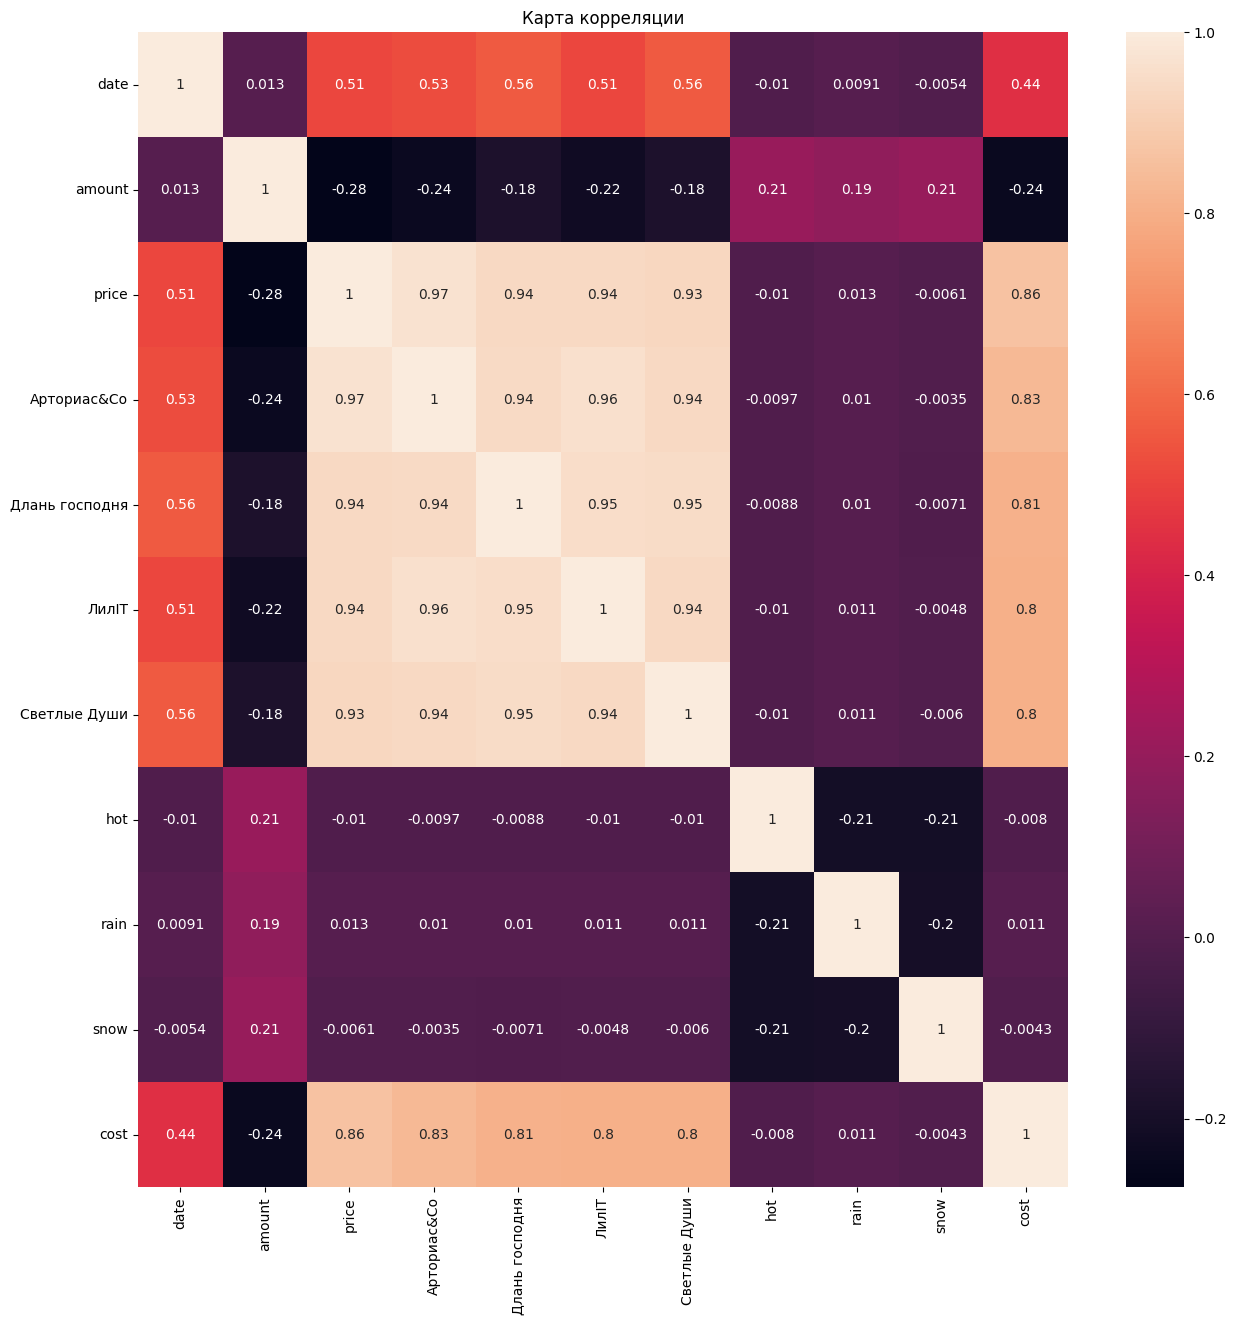

In [198]:
cat_features = [
    'product',
    'place'
]
correlation_matrix = result_dataset.drop(cat_features, axis=1).corr()

plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Карта корреляции')
plt.savefig('corr_matrix.png')

Text(0.5, 1.0, 'Pair plot')

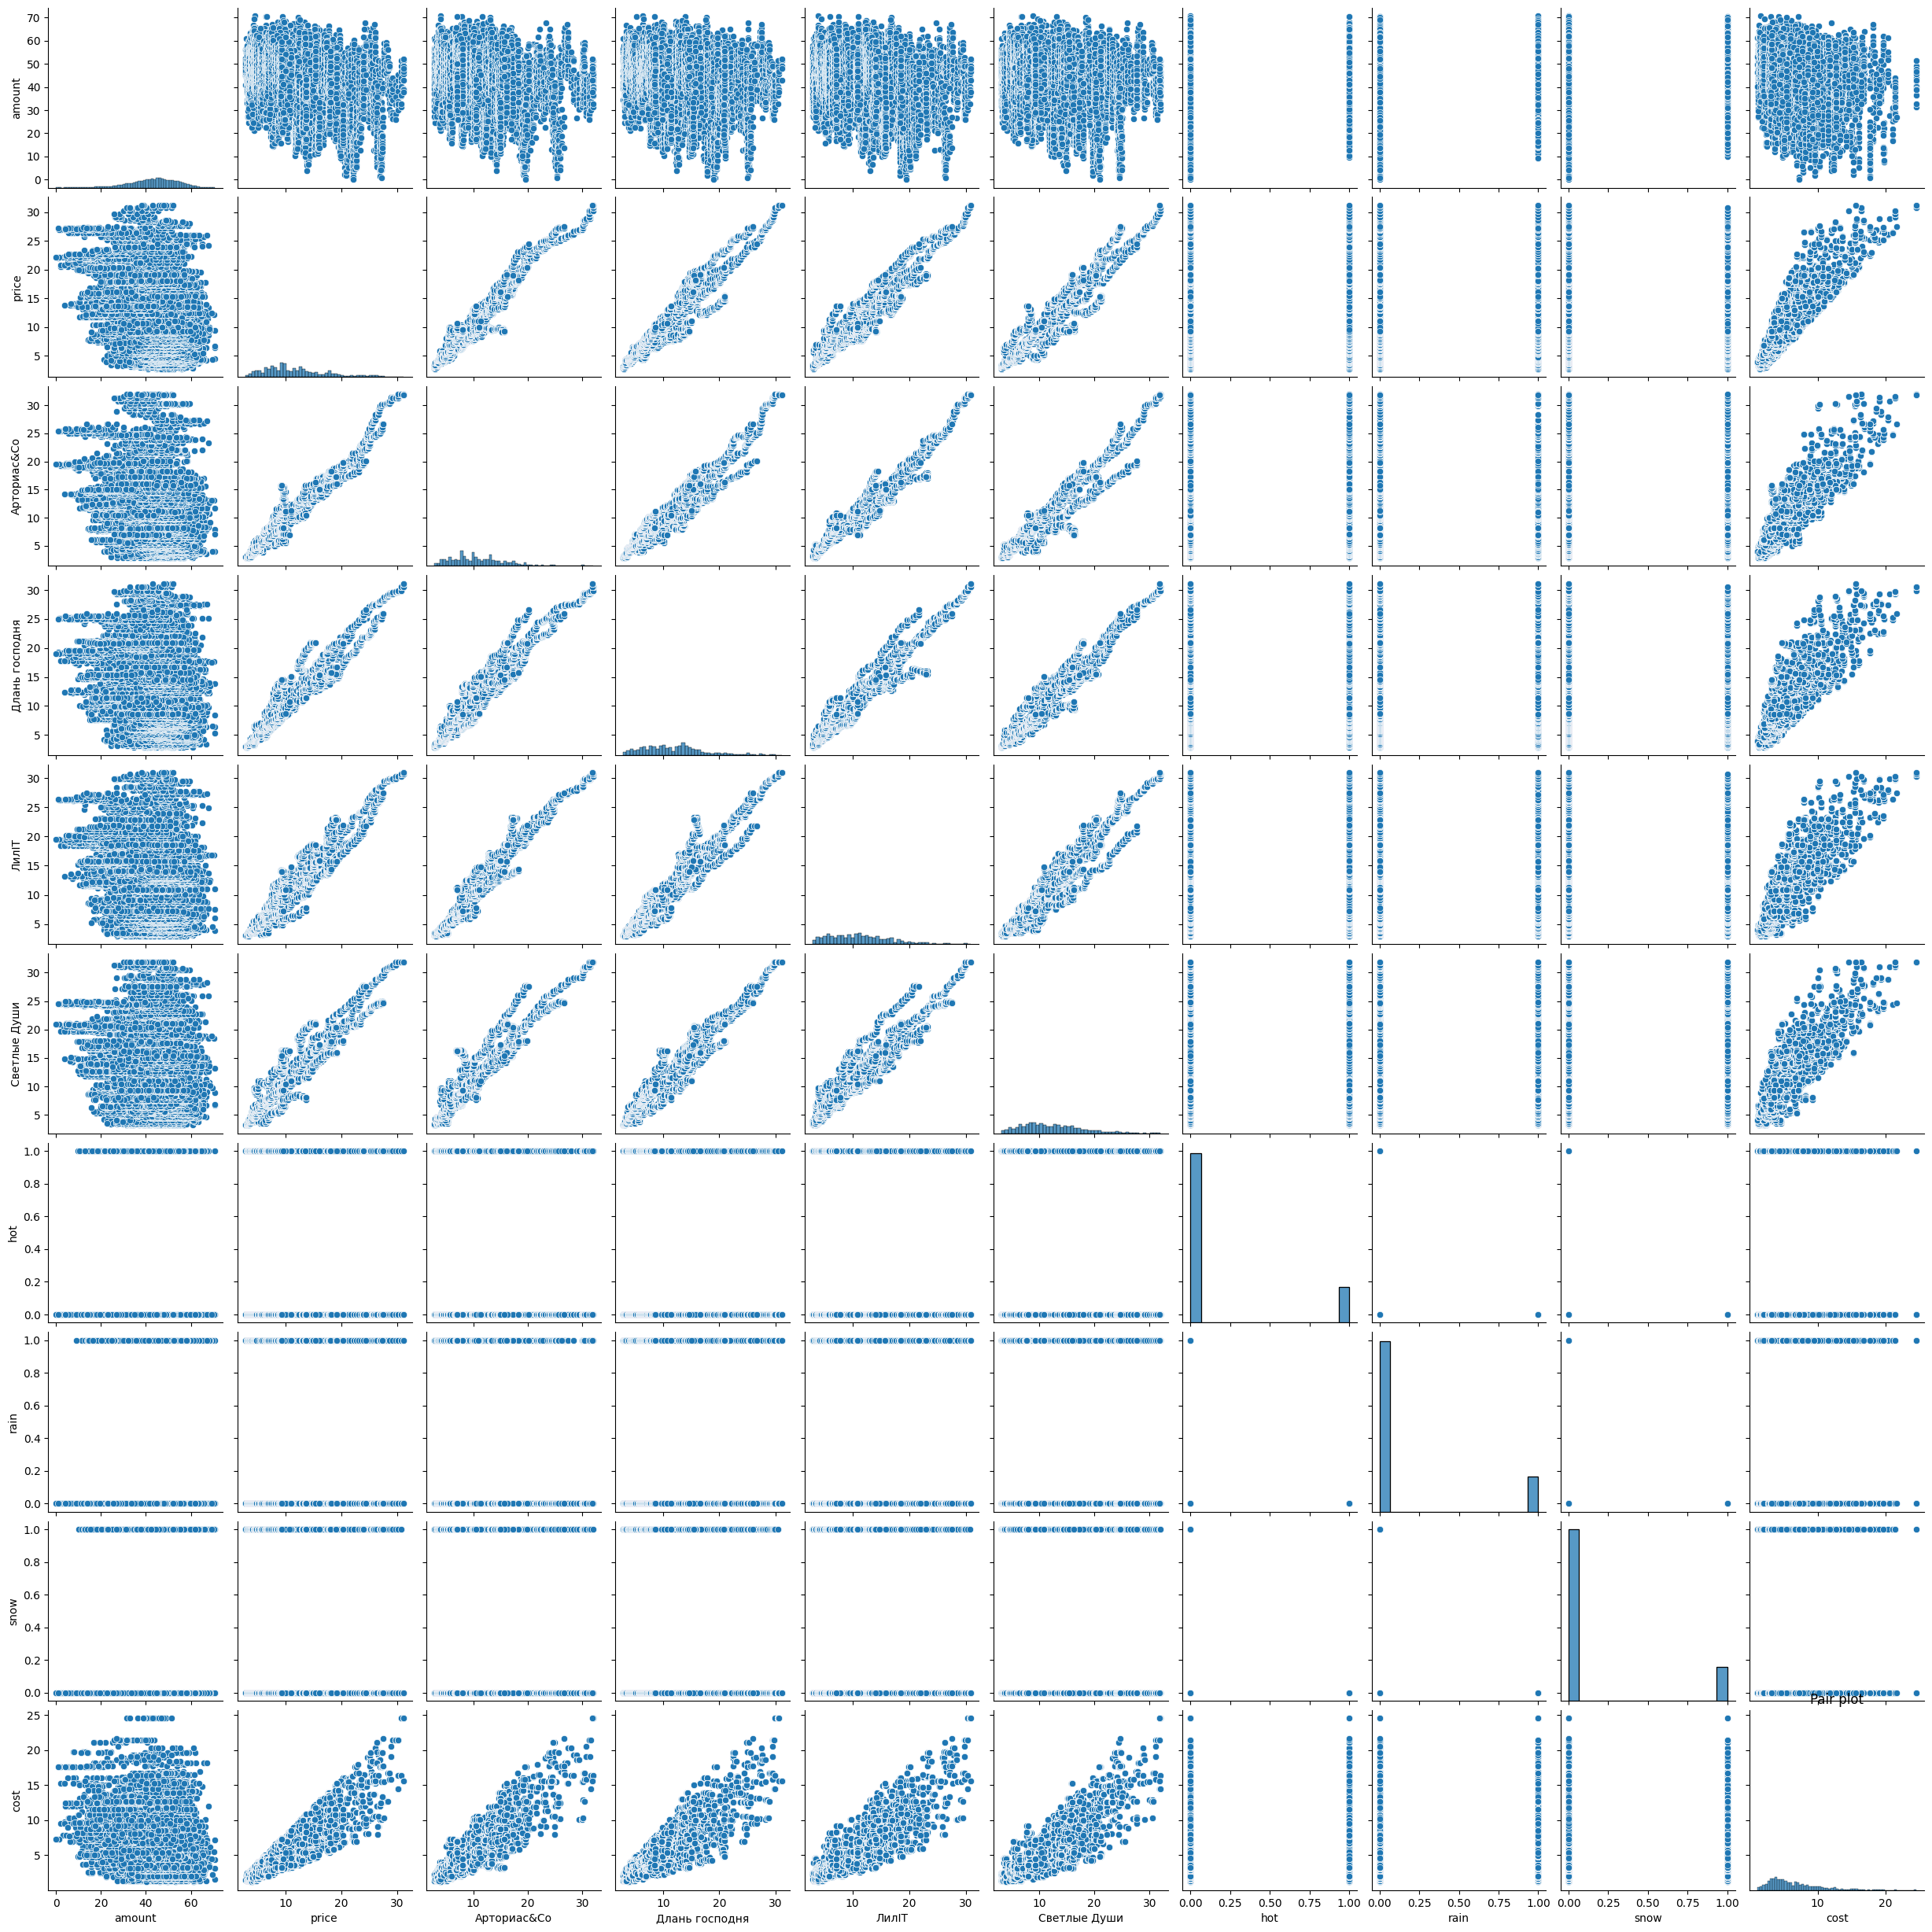

In [199]:
sns.pairplot(result_dataset, kind='scatter')
plt.title('Pair plot')

## Выводы по карте корреляции
Мы получили достаточно ожидаемые результаты относительного того, что есть линейная зависимость между ценами нашей сети магазинов и конкурентов. Чтобы избежать мультиколлинеарности оставим только цену для товаров только от нашего магазина и среднюю цену наших конкурентов.  
Также можем заметить, что коэффициент корреляции между ценой и датой равен 0.5, из чего можно сделать вывод, что линейной зависимости нет между этими переменными и линейные модели могут показать не самые лучшие результаты

In [200]:
result_dataset['average_comp_price'] = result_dataset[['Светлые Души', 'ЛилIT', 'Арториас&Co', 'Длань господня']].mean(axis=1)

In [201]:
result_dataset.drop(competitors, axis=1, inplace=True)

In [202]:
result_dataset.head(3)

product       place       date     amount  price  hot  rain  \
0     Целебные травы  Анор Лондо 2216-01-02  37.802874   3.90    1     0   
1  Эльфийская пыльца   Кеджистан 2216-01-02  53.296328   9.05    0     0   
2  Эльфийская пыльца   Фалькония 2216-01-02  42.887246  11.32    0     0   

   snow  cost  average_comp_price  
0     0  2.07              3.9800  
1     1  4.58              9.2175  
2     0  3.89             11.3100

По карте корреляции ниже можно заметить, что коэффициент корреляции между `price` и `average_comp_price` остался также высоким, что логично так как операция среднего является также линейной операции, поэтому коэффициент корреляции остался высоким

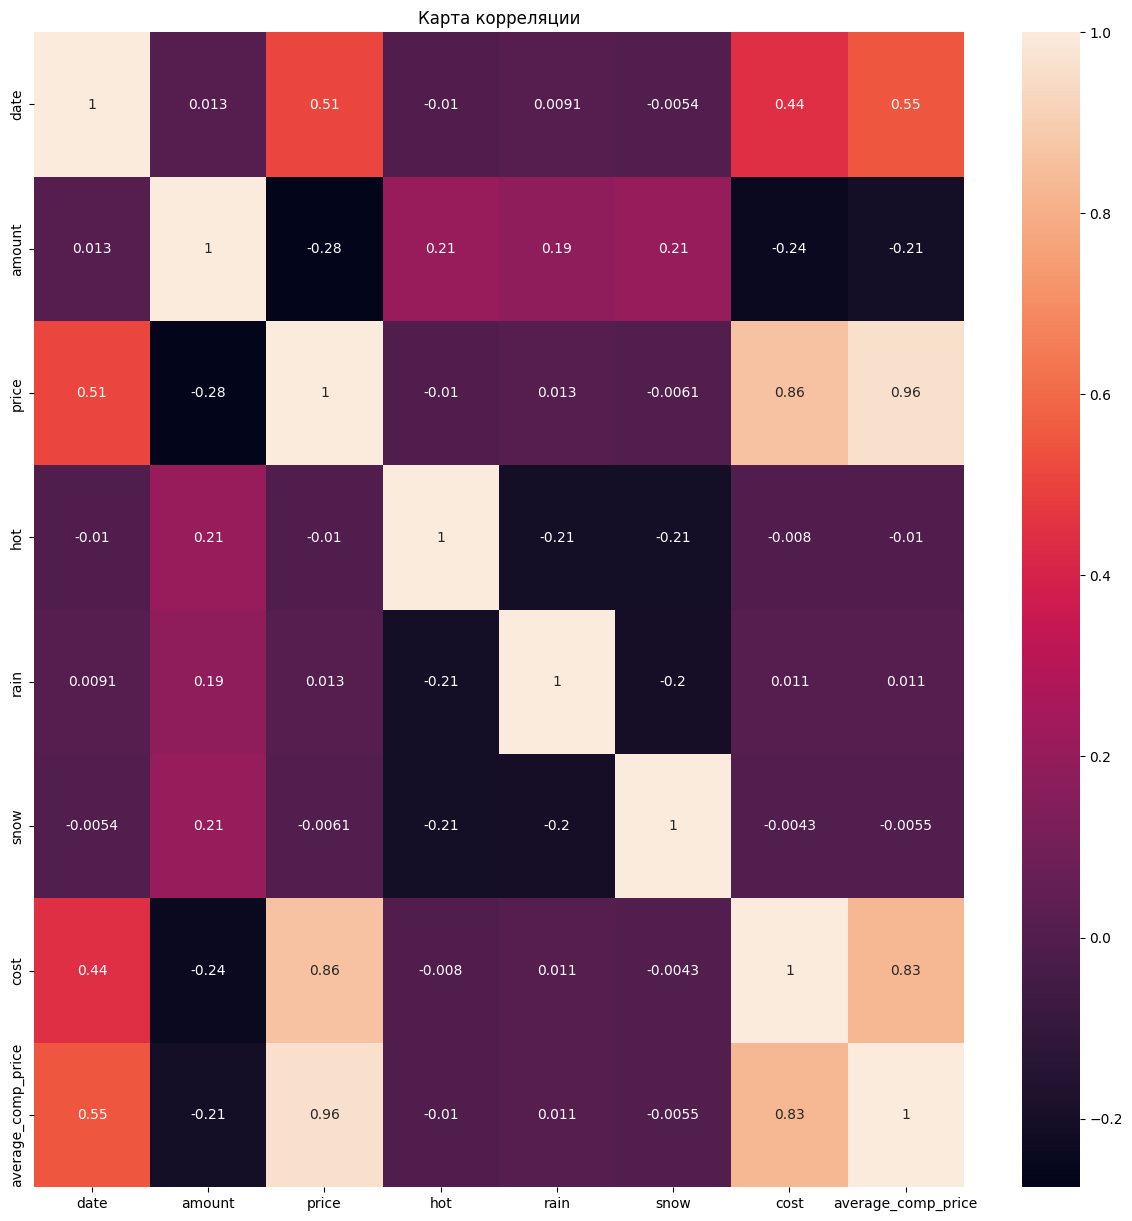

In [204]:
correlation_matrix = result_dataset.drop(cat_features, axis=1).corr()

plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Карта корреляции')
plt.savefig('images/map_corr.png')

In [206]:
result_dataset.to_csv('result_dataset.csv', index=False, encoding='utf-8-sig')

## Проверка влияния погоды на суммарное кол-во проданного товара
Разобьем нашу выборку на 4 подвыборки, когда есть дождь, когда стоит жара, когда идет снег и когда нет погодных катаклизмов  

In [207]:
group_rain = result_dataset.loc[result_dataset['rain'] == 1]
group_snow = result_dataset.loc[result_dataset['snow'] == 1]
group_hot = result_dataset.loc[result_dataset['hot'] == 1]
mask_for_nothing = (result_dataset['rain'] == 0) & (result_dataset['hot'] == 0) & (result_dataset['snow'] == 0)
group_nothing = result_dataset.loc[mask_for_nothing]

In [208]:
result_dataset.shape[0]

14998

In [209]:
group_rain.shape[0] + group_hot.shape[0] + group_snow.shape[0] + group_nothing.shape[0]

14998

Text(0.5, 0.98, 'Распределение amount')

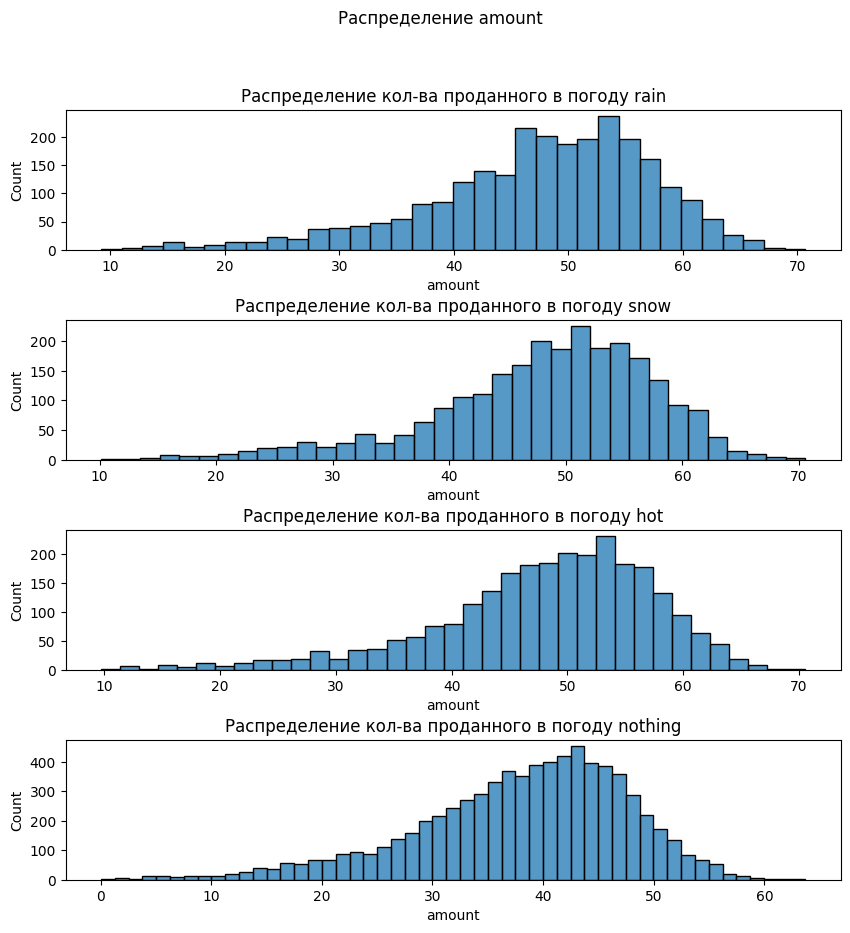

In [210]:
groups = [group_rain, group_snow, group_hot, group_nothing]
name_groups = ['rain', 'snow', 'hot', 'nothing']

fig, axes = plt.subplots(4, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for idx, group in enumerate(groups):
    sns.histplot(data=group, x='amount', ax=axes[idx])
    axes[idx].set_title(f'Распределение кол-ва проданного в погоду {name_groups[idx]}')
    
plt.suptitle('Распределение amount')

Учитывая распределение данных групп для величины `amount` можно использовать среднее, так как оно неплохо описывает центральную тенденцию для наших распределений

In [211]:
mean_for_each_group = {
    'rain': np.mean(group_rain['amount']),
    'snow': np.mean(group_snow['amount']),
    'hot': np.mean(group_hot['amount']),
    'nothing': np.mean(group_nothing['amount'])
}

for key, value in mean_for_each_group.items():
    print(f'{key}, среднее значение: {value}')

rain, среднее значение: 47.55224077369585
snow, среднее значение: 48.17586356181411
hot, среднее значение: 48.147287359906514
nothing, среднее значение: 38.10753680790014


Опираясь на результаты средних для каждой группы, можно сделать предварительный вывод о том, что в среднем кол-во покупок больше в погоду, когда имеется дождь, снег или жара. Попробуем подтвердить или опровернуть это с помощью критерия Манна-Уитни для установления различий между выборками, сравнивая их попарно  

**Нулевая гипотеза (H0)**: Нет статистически значимых различий между распределениями групп.  
**Альтернативная гипотеза (H1)**: Существуют статистически значимые различия между распределениями групп.


In [212]:
from scipy.stats import mannwhitneyu
import itertools

groups = [
    group_rain['amount'],
    group_snow['amount'],
    group_hot['amount'],
    group_nothing['amount']
]

group_names = ['rain', 'snow', 'hot', 'nothing']

combinations = list(itertools.combinations(zip(groups, group_names), 2))

for combination in combinations:
    group1_data, group1_name = combination[0]
    group2_data, group2_name = combination[1]
    
    stat, p_val = mannwhitneyu(group1_data, group2_data)
    print(f'Сравнение между {group1_name} и {group2_name}, P-Value: {p_val}')

Сравнение между rain и snow, P-Value: 0.030839726691402454
Сравнение между rain и hot, P-Value: 0.03932712175904761
Сравнение между rain и nothing, P-Value: 0.0
Сравнение между snow и hot, P-Value: 0.8984407910672827
Сравнение между snow и nothing, P-Value: 0.0
Сравнение между hot и nothing, P-Value: 0.0


### Выводы
Если рассмотреть p-value равным 0.5. То мы не можем отклонить нулевую гипотезу только для случая сравнения `snow` и `hot`.
В остальных случаях можем отклонить нулевую гипотезу, сказав, что есть статистически значимые различия между группами при выбранном p-уровне значимости.

## Catboost Feature Importance
Обучим алгоритм градиентного бустинга для решения задачи регрессии, и сформируем результат влияния признаков на нашу целевую переменную `price`

In [213]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from catboost import CatBoostRegressor

In [214]:
RANDOM_STATE = 101

In [215]:
def metrics_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)

In [216]:
dataset = result_dataset.copy()

X = dataset.drop('price', axis=1)
y = dataset['price']

print(
    f'X.shape = {X.shape}; y.shape = {y.shape}'
)

label_encoder = LabelEncoder()

X['product'] = label_encoder.fit_transform(X['product'])
X['place'] = label_encoder.fit_transform(X['place'])
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day'] = X['date'].dt.day

X.drop('date', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_STATE)

X.shape = (14998, 9); y.shape = (14998,)


In [217]:
catboost = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.01,
    random_state=RANDOM_STATE,
    verbose=50,
    max_depth=12
)

catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)

metrics_report(y_test, y_pred_catboost)

0:	learn: 5.5281549	total: 86.7ms	remaining: 2m 9s
50:	learn: 3.4917699	total: 2.19s	remaining: 1m 2s
100:	learn: 2.2177319	total: 4.33s	remaining: 1m
150:	learn: 1.4399298	total: 6.26s	remaining: 56s
200:	learn: 0.9441470	total: 8.41s	remaining: 54.3s
250:	learn: 0.6387599	total: 10.6s	remaining: 52.9s
300:	learn: 0.4539008	total: 12.9s	remaining: 51.2s
350:	learn: 0.3412937	total: 15.2s	remaining: 49.6s
400:	learn: 0.2771837	total: 17.4s	remaining: 47.7s
450:	learn: 0.2381325	total: 19.8s	remaining: 46s
500:	learn: 0.2130612	total: 22.1s	remaining: 44.1s
550:	learn: 0.1950667	total: 24.4s	remaining: 42s
600:	learn: 0.1815121	total: 26.8s	remaining: 40s
650:	learn: 0.1706628	total: 29.1s	remaining: 37.9s
700:	learn: 0.1620350	total: 31.5s	remaining: 35.9s
750:	learn: 0.1552397	total: 33.9s	remaining: 33.8s
800:	learn: 0.1492655	total: 36.4s	remaining: 31.8s
850:	learn: 0.1437950	total: 38.7s	remaining: 29.5s
900:	learn: 0.1388704	total: 41s	remaining: 27.3s
950:	learn: 0.1343286	total

В полученных результатах меня смущает максимальная глубина решающих деревьев, которая была указана в гиперпараметрах эксперементальным образом, поэтому проведем кросс-валидацию для устранения возможности переобучения

In [218]:
kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_scores = cross_val_score(catboost, X, y, cv=kfold, scoring='neg_mean_squared_error')

0:	learn: 5.5281727	total: 51.6ms	remaining: 1m 17s
50:	learn: 3.4993052	total: 1.84s	remaining: 52.2s
100:	learn: 2.2343256	total: 3.71s	remaining: 51.4s
150:	learn: 1.4423723	total: 5.79s	remaining: 51.7s
200:	learn: 0.9462748	total: 7.86s	remaining: 50.8s
250:	learn: 0.6429453	total: 10.1s	remaining: 50s
300:	learn: 0.4542074	total: 12.3s	remaining: 49s
350:	learn: 0.3426691	total: 14.6s	remaining: 47.8s
400:	learn: 0.2777512	total: 16.9s	remaining: 46.3s
450:	learn: 0.2380823	total: 19.1s	remaining: 44.5s
500:	learn: 0.2125653	total: 21.4s	remaining: 42.7s
550:	learn: 0.1954902	total: 23.6s	remaining: 40.7s
600:	learn: 0.1824918	total: 25.9s	remaining: 38.7s
650:	learn: 0.1714734	total: 28.2s	remaining: 36.7s
700:	learn: 0.1626787	total: 30.5s	remaining: 34.7s
750:	learn: 0.1553494	total: 32.7s	remaining: 32.6s
800:	learn: 0.1488178	total: 35s	remaining: 30.6s
850:	learn: 0.1432272	total: 37.3s	remaining: 28.5s
900:	learn: 0.1383771	total: 39.6s	remaining: 26.3s
950:	learn: 0.13381

In [219]:
mse_scores = -cv_scores

print("Средняя MSE:", mse_scores.mean())
print("Стандартное отклонение MSE:", mse_scores.std())

Средняя MSE: 0.016869574704612016
Стандартное отклонение MSE: 0.0006103816344806148


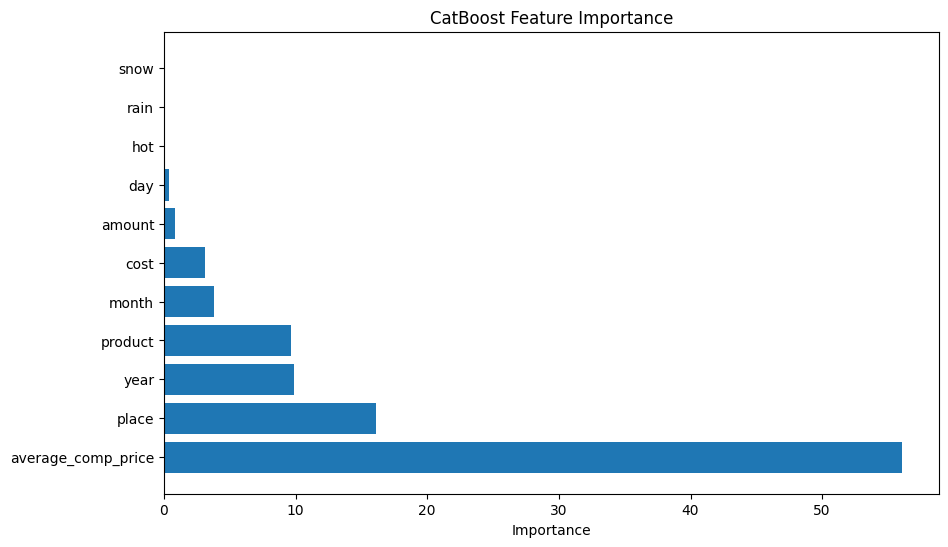

In [221]:
feature_importance = catboost.get_feature_importance(type='PredictionValuesChange')

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance')
plt.savefig('images/catboost_feature_importance.png')
plt.show()

## Какой месяц в году является самым прибыльным в среднем за все время

In [222]:
income_by_month = dataset[['date', 'amount', 'price', 'cost']]
income_by_month.loc[:, 'month'] = income_by_month['date'].apply(lambda x: x.month)
income_by_month.loc[:, 'income'] = income_by_month['amount'] \
    * income_by_month['price'] -  income_by_month['amount'] * income_by_month['cost']

income_by_month.drop(['date', 'price', 'amount', 'cost'], axis=1, inplace=True)

result_income_by_month = income_by_month.groupby('month').mean()

C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\1072223954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_by_month.loc[:, 'month'] = income_by_month['date'].apply(lambda x: x.month)
C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\1072223954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_by_month.loc[:, 'income'] = income_by_month['amount'] \
C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\1072223954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

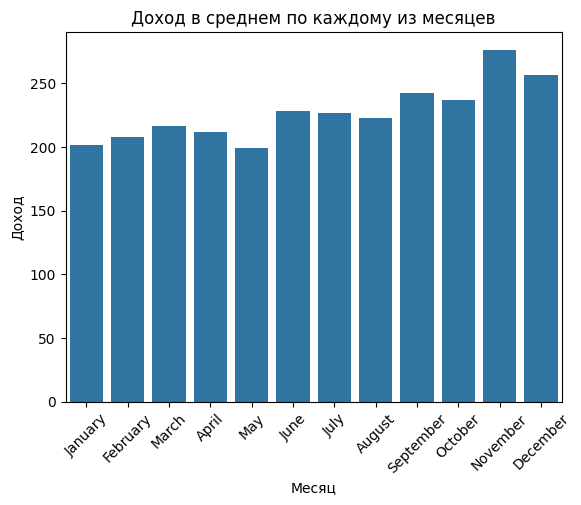

In [224]:
import calendar

income_for_plot_x = [calendar.month_name[x] for x in range(1, 13)]
income_for_plot_y = result_income_by_month['income'].tolist()

sns.barplot(x=income_for_plot_x, y=income_for_plot_y)

plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.title('Доход в среднем по каждому из месяцев')

plt.xticks(rotation=45)

plt.savefig('images/income_by_month.png')
plt.show()

## Какой товар приносит больше всего денег

In [107]:
income_by_product = dataset[['product', 'amount', 'price', 'cost']]
income_by_product.loc[:, 'income'] = income_by_product['amount'] \
    * income_by_product['price'] -  income_by_product['amount'] * income_by_product['cost']

income_by_product.drop(['price', 'amount', 'cost'], axis=1, inplace=True)

result_income_by_product = income_by_product.groupby('product').sum()

C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\1644823163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_by_product.loc[:, 'income'] = income_by_product['amount'] \
C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\1644823163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_by_product.drop(['price', 'amount', 'cost'], axis=1, inplace=True)


In [108]:
result_income_by_product

income
product                        
Целебные травы     8.807556e+05
Эльфийская пыльца  1.471931e+06
Эстус              1.015574e+06

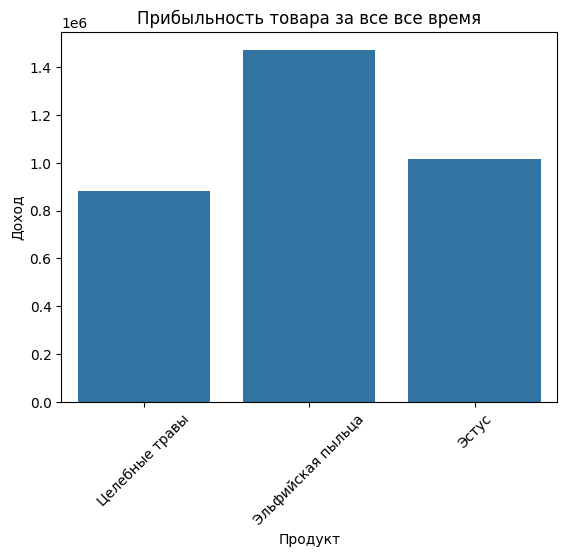

In [109]:
sns.barplot(x=result_income_by_product.index, y=result_income_by_product['income'])

plt.xlabel('Продукт')
plt.ylabel('Доход')
plt.title('Прибыльность товара за все все время')

plt.xticks(rotation=45)

plt.show()

## Какой город принес больше всего доходности за все время

In [110]:
income_by_place = dataset[['place', 'amount', 'price', 'cost']]
income_by_place.loc[:, 'income'] = income_by_place['amount'] \
    * income_by_place['price'] -  income_by_place['amount'] * income_by_place['cost']

income_by_place.drop(['price', 'amount', 'cost'], axis=1, inplace=True)

result_income_by_place = income_by_place.groupby('place').sum()

C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\2855735908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_by_place.loc[:, 'income'] = income_by_place['amount'] \
C:\Users\Никита\AppData\Local\Temp\ipykernel_18592\2855735908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_by_place.drop(['price', 'amount', 'cost'], axis=1, inplace=True)


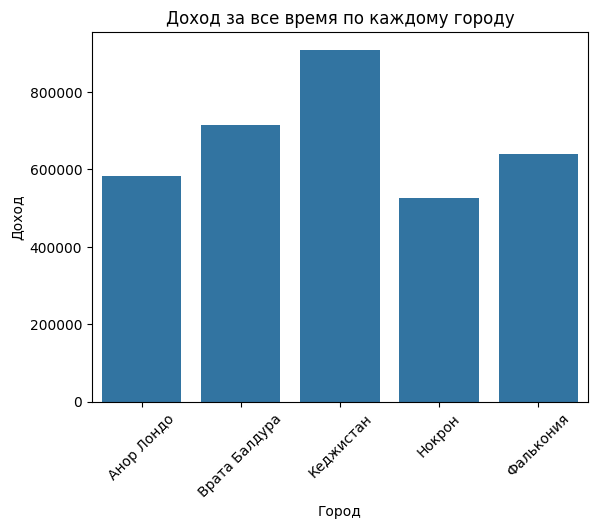

In [111]:
sns.barplot(x=result_income_by_place.index, y=result_income_by_place['income'])

plt.xlabel('Город')
plt.ylabel('Доход')
plt.title('Доход за все время по каждому городу')

plt.xticks(rotation=45)

plt.show()